# Deep Learning approach for single-cell RNA-seq data analysis

# Abstract

In recent years, single-cell RNA sequencing (scRNA-seq) technologies have revolutionised our understanding of cellular heterogeneity. Various methods have been developed to interpret this complexity, with Seurat and scVI emerging as prominent tools for scRNA-seq data clustering. 

This analysis gives insight into the differences in functionality and results of both methods. This is done by exploring the workflow of primarily scVI with relevant mentions of the Seurat workflow. The result of both workflows is a UMAP, which comes from the clustering of the data. Because of this, the difference in UMAPs is completely the result of the different methods used. Seurat uses principal component analysis (PCA) to cluster its data. This is not the case with scVI because it uses variational autoencoders (VAE) to cluster its data, which does not work with normalised data. VAE is a generative model that can identify non-linear patterns and is therefore more applicable to larger and more complex datasets instead of the linear algorithm PCA. The resulting UMAPs give an accurate representation of the clustering and use the lower dimensionality representation to showcase these cell clusters. Both UMAPs are based on the Louvain algorithm to identify the different cell types. This does result in both UMAPs containing 6 cell types, but the resulting types and the clusters differ. 

scVI creates a more informative and representative UMAP than Seurat based on the fact that it shows a clearer division between clusters and cell types. Furthermore, scVI identifies clusters more accurately based on expected biological results than Seurat. The differences can further be seen in the marker genes identified by both workflows.


# Introduction
Effective data handling and interpretation rise to the forefront of research in the rapidly evolving field of bioinformatics, particularly in single-cell RNA sequencing.<sup>1</sup> The gaining popularity of machine learning methodologies accompanies this rise. It transforms the way to analyse and understand complex biological data. These advanced techniques can enhance the ability to handle these datasets and make more accurate and insightful discoveries in single-cell genomics.<sup>2</sup>
In this single-cell RNA sequencing data analysis, the objective is clear: to conduct a comparative analysis between two methodologies, Seurat and single-cell Variational Inference (scVI). Seurat remains a well-established R-based package and is the gold standard for single-cell data analysis. It offers robust linear modelling techniques for dimensionality reduction, batch correction, clustering, and visualisation.<sup>3</sup> However, Seurat is limited by its linearity, assuming that relations between genes are strictly linear.<sup>4</sup> Linearity may not reflect the complexity between non-linear interactions, which is often the case in biological systems.<sup>5</sup> Because of these limitations, scVI will be tested as an alternative on a published dataset.<sup>6</sup> 

## Dataset
The current data result from an in-house single-cell analysis of primordial germ cell-like cells. These cells are formed by way of *in vitro* gametogenesis.<sup>7</sup>  The pluripotent stem cells are turned into germ cells through directed differentiation. *In vitro* gametogenesis is performed to get an insight into the development of stem cells into germ cells.<sup>8</sup>  These cells are preferred due to their early developmental stage when they have not yet differentiated into sperm or eggs. Insight into these cells gives us a better picture of the early stages of human development. 
The samples get created using the "Expression profiling by high throughput sequencing" technique.<sup>7</sup>  With this, the gene expression gets quantified by identifying the abundance of each RNA molecule.
The dataset is split into four different parts. These parts are extracted from the same sample at three other times: 0 hours, 48 hours and 120 hours. Furthermore, there are two instances of the same sample at 0 hours.

## Gametogenesis
Gametogenesis is a complex process within humans and most other mammals. In this process, the germ cells (gametes) form and are difficult to reproduce in the lab.<sup>9</sup>
*In vitro* gametogenesis, a relatively new and emerging part of reproductive biology, assists with reproduction and infertility issues. <sup>10</sup> It allows more accessible analysis and insight into the human body's biological processes.
In the lab, this is done with the use of pluripotent stem cells, which are usually obtained via either embryonic stem cells (ESCs) or induced pluripotent stem cells (iPSCs).<sup>7,9</sup>   This process closely mirrors normal gametogenesis, in which the next step also would be the production of haploid cells by way of meiosis. The created cells (early-stage gametes) are then checked for their cellular health and, if not good enough, filtered out. Finally, to be ready, they might need to be artificially matured to be used in fertilisation.

## Seurat
Developed in 2015, Seurat emerges as one of the go-to R package tools for clustering, dimensionality reduction, and visualising single-cell RNA-seq data.<sup>3</sup> Its popularity is due to its user-friendly interface and the ability to process large datasets efficiently. The package offers a lot of functions for quality control, normalisation, and downstream analysis.<sup>11</sup>

## scVI
Developed in 2018, scVI presents a new tool for clustering, dimensionality reduction, and visualisation of single-cell RNA-seq data.<sup>12</sup> The algorithm behind scVI is based on variational autoencoders (VAEs).<sup>12</sup> This technique reveals underlying patterns, provides new insights into the biology of individual cells and offers a unique perspective on the regulation of gene expression. Its deep learning capabilities hold the potential to uncover intricate cellular relationships and mechanisms which may not be highlighted when using a linear model.<sup>13</sup>  

## Autoencoders
An autoencoder is a type of neural network that's used for unsupervised learning and dimensionality reduction.<sup>14</sup>  Autoencoders do not need exact labels for the training process. They generate their labels from the training process. Autoencoders are primarily utilised for data compression, feature learning and noise reduction. It consists of an encoder that compresses the input data into a lower dimensional representation (latent space) and a decoder that reconstructs this representation into the original input data. Autoencoders can find non-linear patterns in the data, which improves predictability and interpretability. 

The encoder comprises a series of connected layers where each layer captures complex patterns, relationships, or characteristics compactly and efficiently. The input layer takes the raw input and prepares it for preprocessing. The layers between the input and output layers are called the hidden layers. The hidden layers of the encoder capture the higher-level features and patterns in the data. The output from the output layer goes into the latent space, also known as the bottleneck shown in **Figure 1**. 

The latent space represents the abstract of the input data in a lower dimensionality. Every dimension within the latent space represents a specific feature or attribute acquired by the encoder. The output of the latent space will be the input for the decoder. The decoder takes the low-dimension representation from the latent space and attempts to generate the input. Like the encoder, it consists of a series of layers that each decompress the data with the parameters found in the latent space. 

<img src="static/autoencoders.png">

<em><b>Figure 1: </b> Overview of the variational autoencoder's encoder, latent space, and decoder parts.<sup>15</sup> Every layer in the encoder and the decoder has a dense and multiple neurons.</em>


### Variational autoencoders
Variational autoencoders are widely used across the single-cell RNA-seq field. They are generative models that can generate data points. The part that makes variational autoencoders and autoencoders fundamentally different is the latent space architecture, a schematic overview is displayed in **Figure 2**. The encoder of a vanilla autoencoder compresses the data into a singular vector for the decoder to decompress. The encoder of a variational autoencoder generates two parameters: the means and standard deviations. The generation of these two vectors also means that it provides a projection range instead of a single projection point for each learned latent space feature. Variational autoencoders can generate realistic samples based on the provided input.<sup>16</sup> The latent spaces are continuous by design, allowing easy random sampling and interpolation.<sup>17</sup> A benefit of a generative model is that the model can find various patterns in the data using generated realistic-like samples. It can also make up for missing values if the input data contains missing values. Furthermore, it can generate samples and detect patterns if the dataset is very limited. 

<img src="static/variational_autoencoders2.png" width="500" height="600">

<em><b>Figure 2: </b>verview of the encoder, latent space, and decoder parts of the variational autoencoder. Every layer in the encoder and the decoder has dense and multiple neurons.</em>

The vector of means represents the expected values of the latent variables shown in **Figure 3**. The standard deviation vector determines how much uncertainty there is in the latent space and how much the encoding may vary from a particular ‘area’ (distribution) because of that (see **Figure 5**). The decoder learns that the data points slightly vary from the mean and, within the distribution, refer to the same point.

An intermediate is made from the vector of means and a vector of standard deviation (see **Figure 4**). This intermediate is typically a normal distribution. A sample is taken from the normal distribution created in the latent space. Every sample goes into a vector called the sampled vector. The sampled vector is the input for the decoder to decode shown in **Figure 3**. The decoder attempts to reconstruct the samples into the original input data as accurately as possible.


<img src="static/stochastic_geberation.png" width="500" height="600">

<em><b>Figure 3: </b>Example of the sampling process in a variational autoencoder.14 The standard deviation vector and the means vector are parameters for a normal distribution(in this figure called an intermediate). Lastly, the samples are taken from the intermediate for the decoder to decode.</em>


Like the encoder, the decoder has multiple layers to process the input data. 
scVI utilises a deep neural network integrated with a variational autoencoder. This network is trained to optimise the encoding and decoding processes for more effective data compression and generation.

<img src="static/ae_vs_vae.png" width="500" height="600">

<em><b>Figure 4: </b> A representation of the range created by the two vectors. Fitting the Gaussian distribution.<sup>16</sup></em>

## UMAP
UMAP (Uniform Manifold Approximation and Projection) is a visualisation and dimensionality reduction technique used primarily on sizeable single-cell RNA sequencing datasets.<sup>18</sup>  It converts high-dimensional data into a much lower-dimensional space without losing significant data, ensuring higher accuracy. Unlike other dimensionality reduction techniques, such as PCA, UMAP is more suited for data with non-linear relationships and clusters of varying scopes. The algorithm first identifies the clusters based on similar cells and gives them scores based on the distance between the two and the number of `neighbours(log2(num neighbours))`.<sup>19</sup> This score represents the overlap/similarity between the two cells. UMAP uses that score to move different clusters closer to each other. It then utilises an iterative process to adjust the data points to keep moving points of the same cluster closer together and from different clusters further apart. This process is semi-randomly decided based on the similarity scores and can slightly differ between runs. Only picking two points makes running larger datasets much faster.
These are a couple of the reasons why UMAP is most often used to visualise clusters, identify cell types and get information about their links.<sup>18</sup>  The visualisations make it easier to accurately represent the data, making it much easier to interpret the biological implications.

## Goal
This report outlines the strategy for comparing Seurat and scVI in various aspects. The evaluation includes assessing performance in clustering and cell type identification, conducting differential gene expression analysis, and assessing the ability to identify rare cell populations using UMAP-based visualisations.
The primary focus is discerning the differences between both methods, accomplished by evaluating their respective clusters through a confusion matrix and examining the gene markers. The assessment also includes computational efficiency, scalability, and ease of use to comprehensively assess these tools' practical utility in different research scenarios. It is also essential to consider the differences between running it on a GPU and a CPU.



By systematically comparing Seurat and scVI, this study aims to guide researchers in selecting the most suitable tool for their specific scRNA-seq analysis needs. Ultimately, this research will contribute to the advancement of single-cell genomics by enabling researchers to make informed choices regarding analysis methods and, in turn, enhance the accuracy and biological relevance of their findings. 

- Understand the difference and potential improvements of VAE over PCA-based approach
- Can VAE detect marker genes found by Seurat that are proven to be relevant? Furthermore, can a VAE detect additional novel marker genes?
- Is there a significant difference between the Seurat and scVI UMAPs and is it biologically significant?

# Workflow
## Materials
### Required packages
To perform the single cell analysis workflow, the following Python packages were required.

In [4]:
import os
import time
import logging
import warnings
import random

import numpy as np
import pandas as pd
import torch
import anndata
import scanpy as sc
import scvi
import session_info
import matplotlib.pyplot as plt
from gprofiler import GProfiler
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.model_selection import ParameterGrid

### Settings

The start time got specified for later use in the runtime calculation. scVI got its seed set to zero. Torch/cuda got configured to either run on gpu or cpu. 

In [5]:
start_time = time.time()
seed = 0
scvi.settings.seed = seed
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
np.random.seed(seed)
random.seed(seed)

scvi.settings._dl_pin_memory_gpu_training = 20000

sc.set_figure_params(figsize=(5, 5))
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
logging.getLogger('scvi').setLevel(logging.WARNING)

use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")

tensor_high_precision = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64, device=device)
torch.set_float32_matmul_precision('high')
save_dir = os.getcwd()

plt.rcParams["axes.grid"] = False


Global seed set to 0


For this experiment, the following versions of the Python packages were used:

1. `Anndata` stored the data in objects and merges the different data frames.
2. `Gprofiler` was used for the pathway analysis.
3. `Matplotlib` was used for numerous plots to visualise the data.
4. `NumPy` featured many options for calculation with a focus on making it possible to transfigure entire lists of numbers. It was used for a few features, like the function 'ceiling'.
5. `Pandas` was used to create data frames and organise the data.
6. `Scanpy` was used for the filtering and visualising of single-cell data.
7. `scVI` was the focus of this project and was used for clustering.
8. `Session` info was used to document the correct version numbers used in the workflow.
9. `Sklearn` was used to calculate the confusion matrix and Cohen's Kappa score.
10. `Torch` was used to run/test our model; CUDA specifically was used for Nvidia GPUs, which can run the model parallel.

Below were the documented version numbers for all their respective software versions.


In [6]:
session_info.show()

## Load the count tables

First, the four raw matrices of hiPSC 10x-Genomics-formatted hdf5 file were read for the workflow. This described the count per gene at a given time point.

In [7]:
data_0h_A = sc.read_10x_h5("data/0h_A_raw_feature_bc_matrix.h5")
data_0h_B = sc.read_10x_h5("data/0h_B_raw_feature_bc_matrix.h5")
data_48h = sc.read_10x_h5("data/48h_raw_feature_bc_matrix.h5")
data_120h = sc.read_10x_h5("data/120h_raw_feature_bc_matrix.h5")

In [8]:
data_0h_A.obs['run'] = "0h_A"
data_0h_B.obs['run'] = "0h_B"
data_48h.obs['run'] = "48h"
data_120h.obs['run'] = "120h"

## Method
### Data Preprocessing

The data was filtered on the following points. Cells of low quality were filtered on the number of genes in the cell. The number of cells was set to a minimum of three, and the number of genes within a cell was set to a minimum of 200. A unique index was then appended to each duplicate index element, eliminating duplicates from the dataset.



In [9]:
sc.pp.filter_genes(data_0h_A, min_cells=3)
sc.pp.filter_genes(data_0h_B, min_cells=3)
sc.pp.filter_genes(data_48h, min_cells=3)
sc.pp.filter_genes(data_120h, min_cells=3)

In [10]:
sc.pp.filter_cells(data_0h_A, min_counts=200)
sc.pp.filter_cells(data_0h_B, min_counts=200)
sc.pp.filter_cells(data_48h, min_counts=200)
sc.pp.filter_cells(data_120h, min_counts=200)

In [11]:
data_0h_A.var_names_make_unique()
data_0h_B.var_names_make_unique()
data_48h.var_names_make_unique()
data_120h.var_names_make_unique()

The batch name was added to the key row name, in this case the first column.

In [12]:
data_list = [data_0h_A, data_0h_B, data_48h, data_120h]
keys = ['batch_2_A', 'batch_2_B', 'batch_1_sample_48H', 'batch_1_sample_120H']
for data, key in zip(data_list, keys):
    data.obs_names = key + '_' + data.obs_names

adata = anndata.concat(data_list, join="outer")

In [13]:
sample_names = pd.read_table("data/sample_name_full_dataset.tsv")
sample_names.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
sample_names.set_index('Sample', inplace=True)
adata.obs['sample_name'] = adata.obs_names.map(sample_names['sample_name'])

High levels of mitochondrial DNA in samples might indicate cell damage, which could lead to unreliable results. Such high levels meant a proportion of apoptotic or lysing cells. For this reason, an extra column was created with the percentage of mitochondrial DNA relative to the total count.

In [14]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top= None, log1p=False, inplace=True)

### Dataframe with calculate qc metrics
The columns of the anndata object, showed in **Table 1**, consisted of `barcode_sequence`, `run`, `n_counts`, `sample_name`, `n_genes_by_counts`, `total_counts`, `total_counts_mt` and `pct_counts_mt`.

`barcode_sequence` described the batch combined with the sequence as a unique barcode name. `run` described the unique name of the experiment. `n_counts` represented the number of transcripts detected in the cell, indicating the total number of RNA molecules detected. `sample_name` indicated the experiment to which the cell belongs. `n_genes_by_counts` gave the number of unique genes detected in the cell compared to the total counted. Total_count returned the same value 'n_count'. `total_counts_mt` gave the total number of transcripts derived from mitochondrial genes in the cell. `pct_counts_mt gives` gave the percentage of all transcripts in the cell from mitochondrial genes.

<em><b>Tabel 1:</b> Table containing the calculated number of qc matrix of the AnnData object. The AnnData object consisted of barcode_sequence, run, n_counts, sample_name, n_genes_by_counts, total_counts, total_counts_mt and pct_counts_mt.</em>

In [15]:
data = pd.DataFrame(data=adata.obs)
data.head()

run  n_counts  sample_name  n_genes_by_counts  \
batch_2_A_AAACCCAAGGTAATCA-1  0h_A   48806.0    iPSC_99_4               6892   
batch_2_A_AAACCCAAGGTACCTT-1  0h_A   42383.0  iPSC_20_6_4               6574   
batch_2_A_AAACCCAGTCGTTCAA-1  0h_A   15016.0    iPSC_54_3               3975   
batch_2_A_AAACCCATCACAGTGT-1  0h_A   37052.0    iPSC_72_1               6262   
batch_2_A_AAACCCATCCCTCTCC-1  0h_A    2387.0    iPSC_72_1                374   

                              total_counts  total_counts_mt  pct_counts_mt  
batch_2_A_AAACCCAAGGTAATCA-1       48806.0           2494.0       5.110028  
batch_2_A_AAACCCAAGGTACCTT-1       42383.0           2371.0       5.594224  
batch_2_A_AAACCCAGTCGTTCAA-1       15016.0            881.0       5.867075  
batch_2_A_AAACCCATCACAGTGT-1       37052.0           1978.0       5.338443  
batch_2_A_AAACCCATCCCTCTCC-1        2387.0           1977.0      82.823631

## Results preprocessing

A violin plot was a data visualisation method that combines aspects of a box plot and a kernel density plot. It was particularly useful for displaying the distribution and summary statistics of numerical data across different categories or groups. The violin plot got its name from its shape, which resembled a violin. The violin plots in  **Figure 5** showed the values for `n_genes_by_counts`, `total_count` and `ppct_counts_mt` per run before preprocessing.

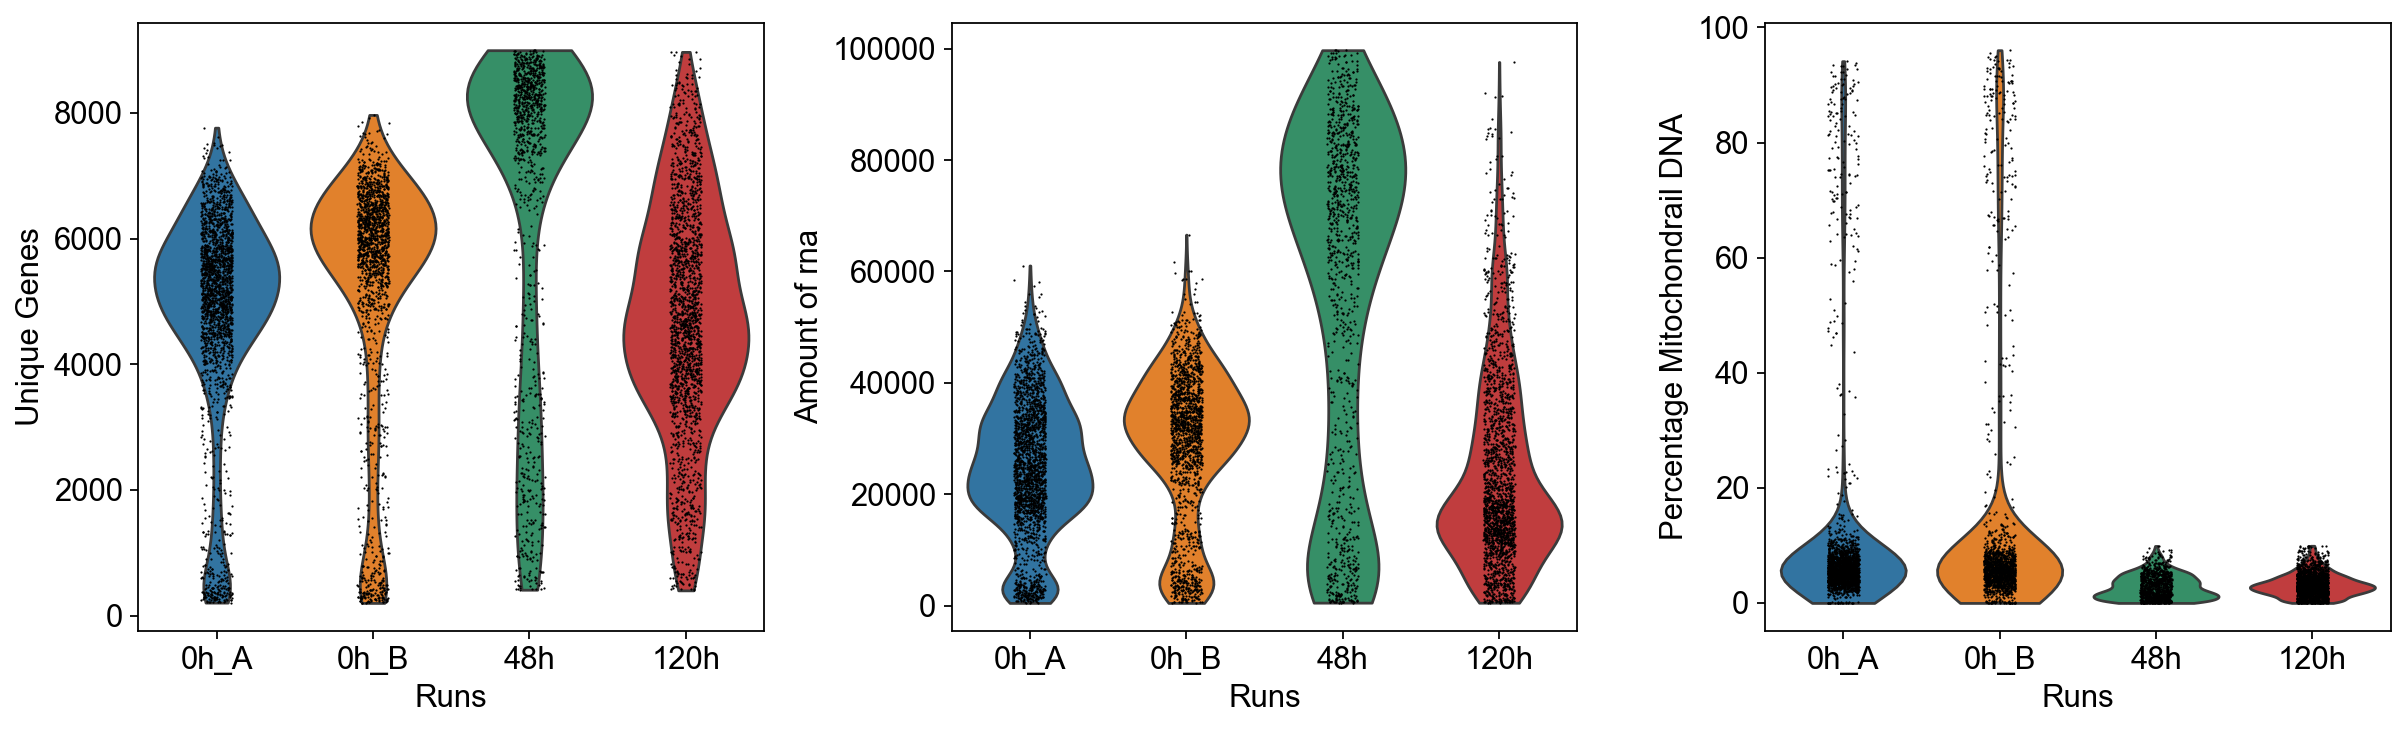

In [16]:
sc.pl.violin(adata, keys = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], multi_panel=True, groupby='run', xlabel="Runs", ylabel=["Unique Genes", "Amount of rna", "Percentage Mitochondrail DNA"])

<em><b>Figure 5:</b> The violin plots showed the values for n_genes_by_counts, total_count and ppct_counts_mt per run.</em>

### Total counts vs percentage of mitochondrial DNA

The scatterplot displayed the total cell count (`total_counts`) on the X-axis and the percentage of mitochondrial DNA (`pct_counts_mt`) on the Y-axis. **Figure 6** showed that cells with a differentiation time of zero hours were the only ones to exhibit a mitochondrial DNA percentage above 10%. **Table 2** confirmed this observation by presenting the maximum amount of mitochondrial DNA for each differentiation time.

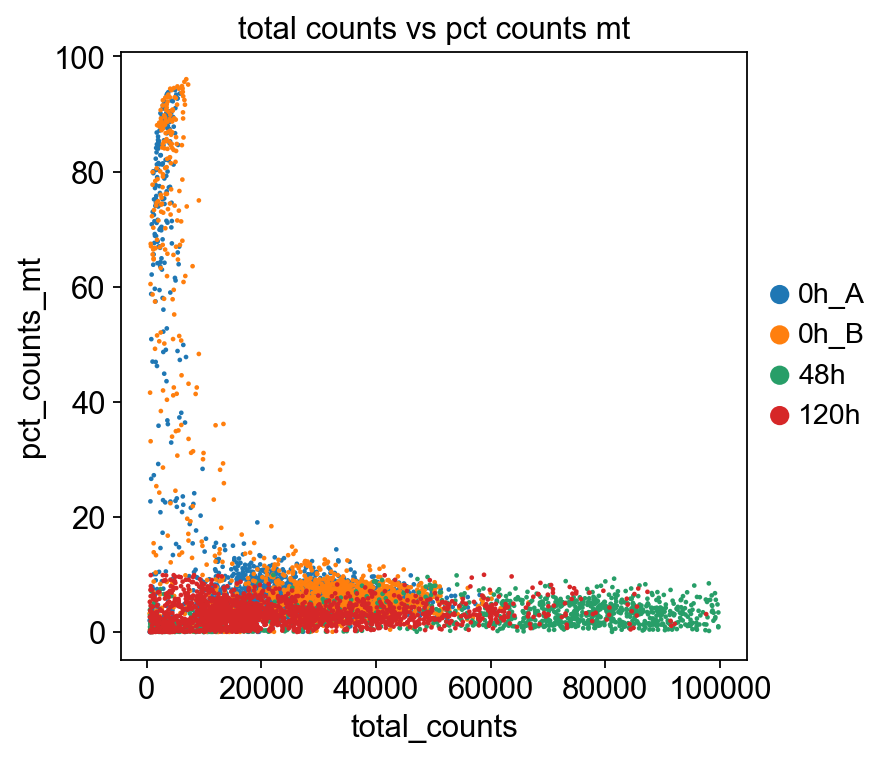

In [17]:
sc.pl.scatter(adata, "total_counts", "pct_counts_mt", title="total counts vs pct counts mt", color="run")

<em><b>Figure 6:</b> The scatter plot displayed the total number of transcripts on the x-axis and the percentage of mitochondrial DNA on the y-axis. In cases where the mitochondrial DNA exceeded 10%, the RNA counts were below 20,000 and were from the runs where the differentiation time is 0 hours. High mitochondrial DNA levels were consistently observed in both runs where the differentiation time was zero. <b>Table 2</b> confirmed that mitochondrial DNA exceeds 10% in cases with zero differentiation time.</em>

In [18]:
total_values = data.groupby('run')['pct_counts_mt'].count()
data2 = data[data['pct_counts_mt'] > 10]
c2 = data2.groupby('run')['total_counts'].max()
count_values = data2.groupby('run')['pct_counts_mt'].count()
percentage_values = round((count_values / total_values) * 100, 2)
max_values = data.groupby('run')['pct_counts_mt'].max()

result_mt = pd.DataFrame({'Total': total_values, 'Total above 10 %': count_values, 'Percentage above 10 %': percentage_values, 'Max count of MT > 10 %': c2, 'Max Percentage': max_values})

<em><b>Table 2:</b> Display of the total mitochondrial counts per batch, the percentage mitochondrial DNA exceeding 10% alongside the corresponding RNA count, and the maximum percentage of mitochondrial RNA count. The data confirmed the consistent observation of elevated mitochondrial DNA levels above 10% with RNA counts below 45,000 in runs with zero differentiation time.</em>

In [19]:
result_mt

Total  Total above 10 %  Percentage above 10 %  Max count of MT > 10 %  \
run                                                                            
0h_A   2110             290.0                  13.74                 36251.0   
0h_B   1649             279.0                  16.92                 44828.0   
120h   1966               NaN                    NaN                     NaN   
48h    1050               NaN                    NaN                     NaN   

      Max Percentage  
run                   
0h_A       94.148613  
0h_B       96.055687  
120h        9.930489  
48h         9.898523

### Total counts vs N genes by counts


The scatterplot displayed in **Figure 7** the total cell count (`total_counts`) on the X-axis and the number of genes (`n_genes_by_counts`) on the Y-axis.

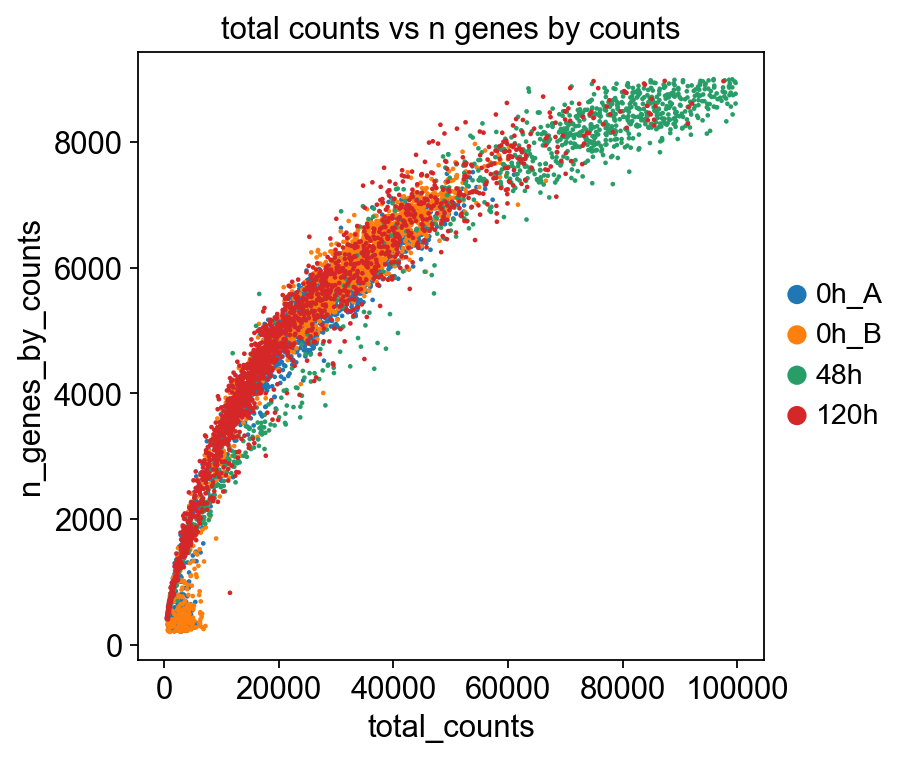

In [20]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", title="total counts vs n genes by counts", color="run")

<em><b>Figure 7:</b> The total counts plotted on the x-axis and the genes by counts on the y-axis.</em>

## Filtering data
The AnnData object was subsetted by filtering based on various parameters. Specifically, genes with a count between 2,000 and 7,000, a total count less than 100,000 and a percentage of mitochondrial DNA between 0.1 and 10. After filtering, the shape of the AnnData object was reduced from 6775 cells to 4694 cells. The violin plots in **Figure 8** showed the values for `n_genes_by_counts`, `total_count` and `ppct_counts_mt` per run after preprocessing. The third graph had the most notable difference, with the filtering of 10% mitochondrial DNA (`pct_counts_mt`).

In [21]:
subset_condition = (
    (adata.obs['n_genes_by_counts'] > 2000) &
    (adata.obs['n_genes_by_counts'] < 7000) &
    (adata.obs['n_counts'] < 100000) &
    (adata.obs['pct_counts_mt'] < 10) &
    (adata.obs['pct_counts_mt'] > 0.1)
)
adata = adata[subset_condition, :]

In [22]:
filtering_count = adata.shape
print(f"Current number of cells and features: {filtering_count}")

Current number of cells and features: (4694, 23543)


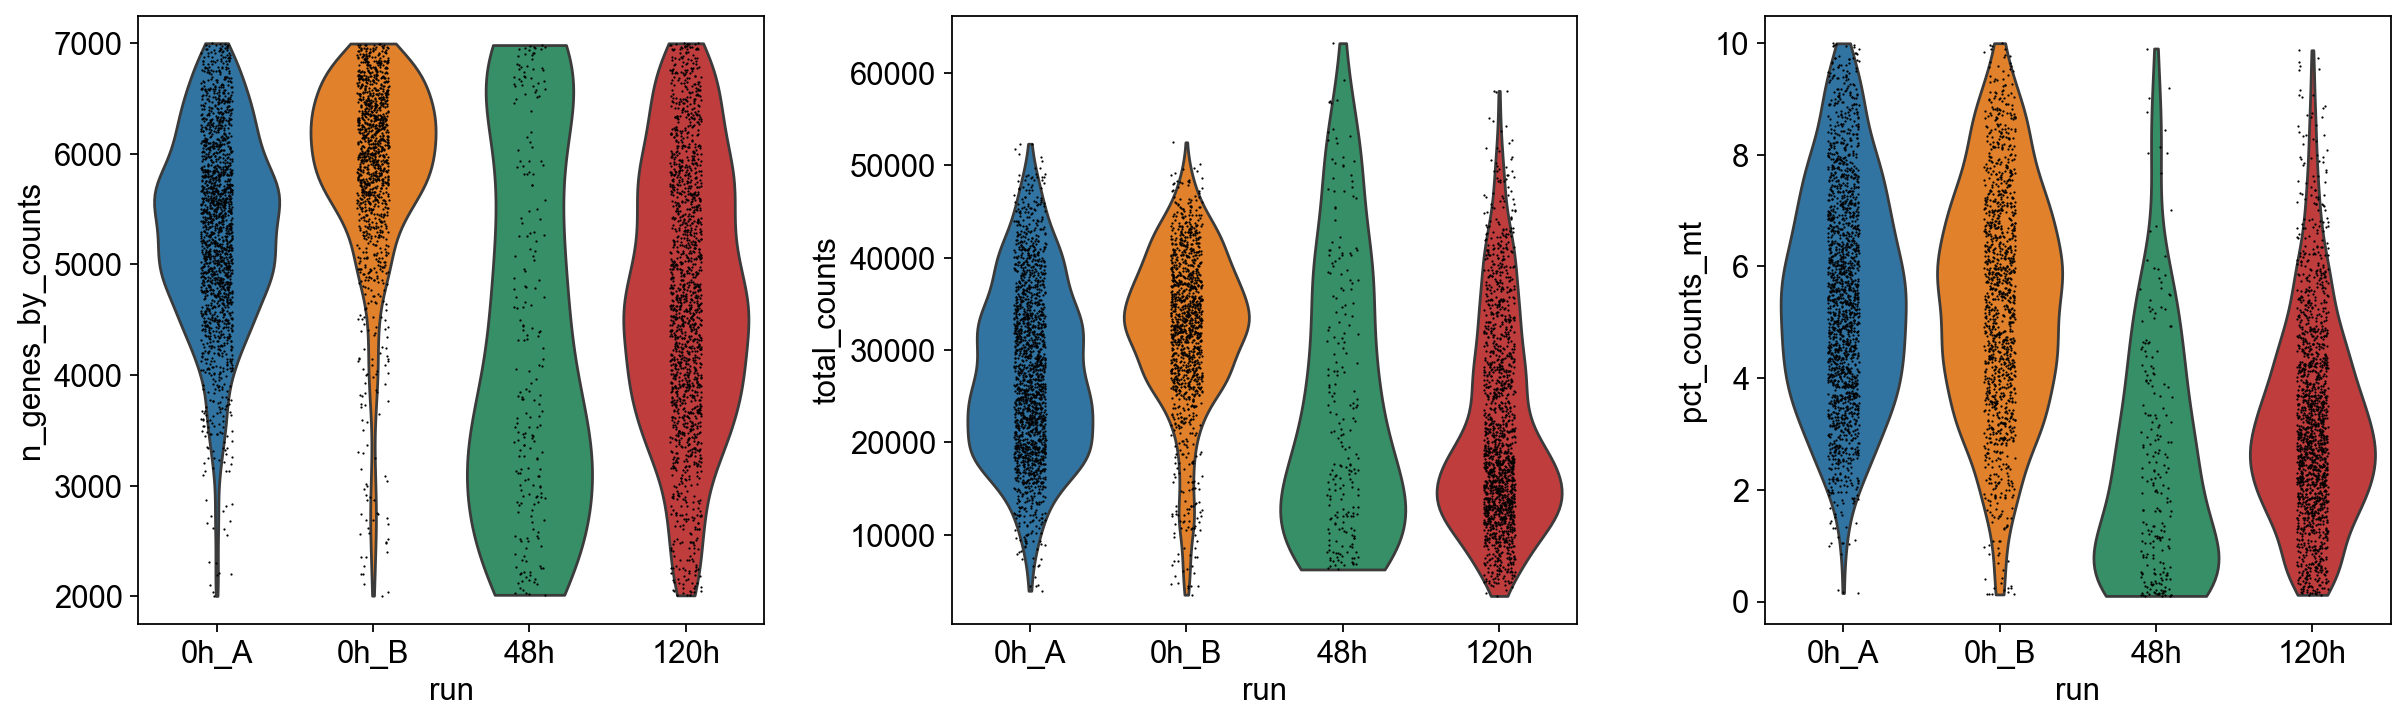

In [23]:
sc.pl.violin(
    adata,
    [
     'n_genes_by_counts',
     'total_counts',
     'pct_counts_mt'
     ],
    multi_panel=True,
     groupby='run'
)

<em><b>Figure 8:</b> Showing the impact of the filtering step in all three graphs. The first graph is filtered by all unique genes under 2,000 or above 7,000. The second graph showed the differences in total data remaining after the filtering, with the total counts significantly reduced from around 100,000 to slightly more than 60,000. The third graph had the most notable difference, with the hard cut-off of 10% mitochondrial DNA.</em>

## Normalisation

A copy of the data is stored in the counts layer. The data got normalised to a target sum of 100,000. It then got log transformed and saved to the raw version to preserve an unprocessed version of the data.

In [24]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e5)
sc.pp.log1p(adata)
adata.raw = adata

A subset was made of the 2,000 most highly variable genes. This was done in the same way as it would be done in Seurat.

In [25]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    subset=True,
    layer="counts",
    flavor='seurat_v3',
    batch_key="sample_name"
)

In [26]:
sc.pp.scale(adata)

## Data for training 
The data used for the training process is displayed in **Table 3**. Insight into the training data gave a reference point that can improve reproducibility.

<em><b>Table 3:</b> The current state of our data for future reference.</em>

In [27]:
adata.var.head()

mt  n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
AADAC  False                171     0.037196              97.476015   
AAMDC  False               3837     1.291808              43.365314   
AASS   False               4307     2.410775              36.428044   
ABCA1  False               1422     0.419483              79.011070   
ABCA5  False                244     0.039410              96.398524   

       total_counts  highly_variable  highly_variable_rank     means  \
AADAC         252.0             True                 522.0  0.026417   
AAMDC        8752.0             True                 733.0  1.060503   
AASS        16333.0             True                 547.0  2.395824   
ABCA1        2842.0             True                 789.0  0.249893   
ABCA5         267.0             True                1143.0  0.040264   

       variances  variances_norm  highly_variable_nbatches      mean       std  
AADAC   0.055130        1.800329                         3  0.036429  0.273192  
AAMDC   2.448075        1.480717                         2  1.102956  1.019129  
AASS   10.105808        1.767788                         3  1.572714  1.256037  
ABCA1   0.516913        1.534352                         3  0.311137  0.733572  
ABCA5   0.049732        1.067651                         1  0.058984  0.309581

## Distribution of batches of training data

The number of cells in each run was represented in a bar plot to illustrate the data distribution across these runs. This representation was achieved by collating the cell counts for all genes and specifically for the 2,000 highly variable genes. The information was then displayed as two separate bars for each run as can be seen in **Figure 9**.

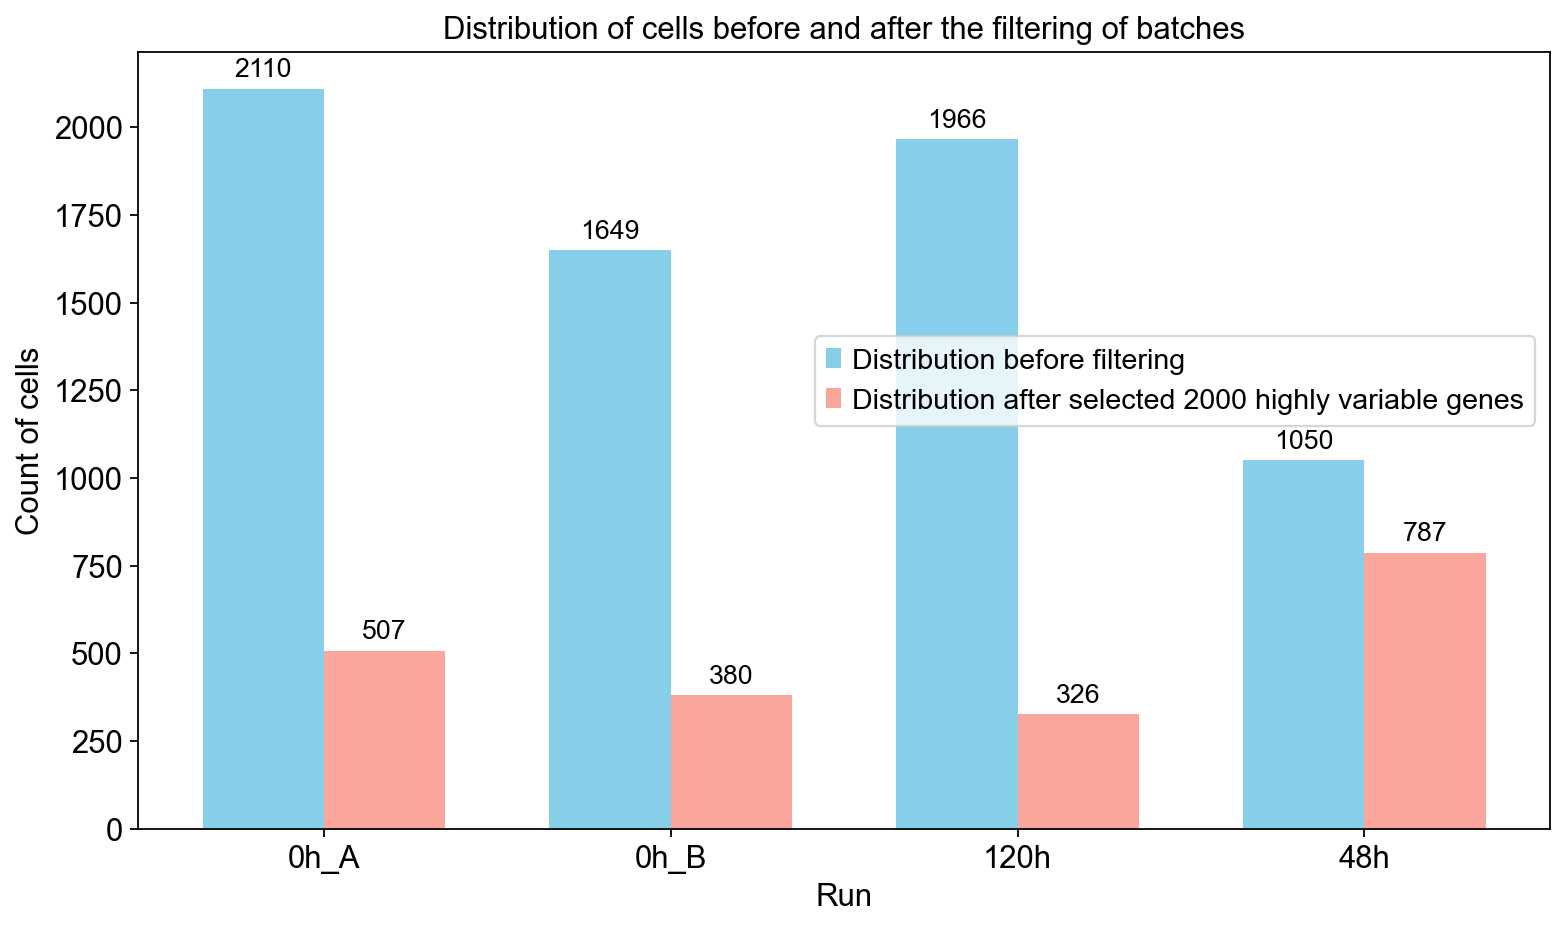

In [28]:
data1 = data['run'].value_counts().sort_index()
data2 = adata.var["highly_variable_nbatches"].value_counts().sort_index()

labels1 = data1.index.tolist()
values1 = data1.values.tolist()

labels2 = data2.index.tolist()
values2 = data2.values.tolist()

bar_width = 0.35
index1 = range(len(labels1))
index2 = [i + bar_width for i in index1]

plt.figure(figsize=(10, 6))

plt.bar(index1, values1, bar_width, label='Distribution before filtering', color='skyblue')
plt.bar(index2, values2, bar_width, label='Distribution after selected 2000 highly variable genes', color='salmon', alpha=0.7)

for i, v in enumerate(values1):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(values2):
    plt.text(i + bar_width, v + 20, str(v), ha='center', va='bottom', fontsize=12)


plt.title('Distribution of cells before and after the filtering of batches') 
plt.xlabel('Run')
plt.ylabel('Count of cells')
plt.xticks([i + bar_width / 2 for i in index1], labels1)
plt.legend(loc=4, bbox_to_anchor=(1, 0.5)) 

plt.tight_layout()
plt.show()

<em><b>Figure 9:</b> Distribution of the data before the filtering step compared to the distribution of the most highly variable genes. This showed that the 48h run was most highly variable.</em>

## Training size
In this VAE, a training size of 0.9 was used, meaning the total data was multiplied by 0.9, resulting in training data. The training data was divided into batches with a batch size of 128. However, in this rare case, the remainder of all the batch sizes was 1; Therefore, the script adjusted the training with increments of 0.01 so the remainder was not one anymore. The model had a set number of epochs, in this case, 100. For each epoch, it shuffled the training data and divided it into batches. Each time it fed a batch into the model, it was called an iteration.<sup>20</sup> So, there were N iterations for every epoch, where N was the number of batches, as seen in **Figure 10**. 

In [29]:
training_size = 0.9
while np.ceil((len(adata) * training_size) % 128) == 1: training_size -= 0.01
print(f"Current training_size: {training_size}")

Current training_size: 0.89


![alt text](static/training_size.png "Title")

<em><b>Figure 10:</b> This was an example of how each epoch works. For every epoch, the training data was divided into batches of 128; these batches would be different for every epoch. Every time the batch was fed into the model, it was called an iteration.<sup>20</sup> So, for every epoch, there were N iterations, where N the number of batches was.</em>

## Epoch size

The model was trained for a set number of epochs, each representing a training iteration where every cell passes through the network. By default, scVI applied a heuristic to determine epoch count: 400 epochs for datasets with fewer than 20,000 cells, gradually reducing the count as cell numbers exceed 20,000. This strategy capitalized on the network processing a larger volume of cells per epoch, enabling it to glean similar information compared to using more epochs with fewer cells.

In [30]:
epochs_size = int(np.min([round((20000 / adata.n_obs) * 100), 400]))
print(f"Current epoch size: {epochs_size}")

Current epoch size: 400


## Hyperparameter Optimisation

For the hyperparameter optimisation, a grid with parameters was used to find the best combination of parameters. It was a combination of the number of nodes per hidden layer (`n_hidden`), the dimensionality of the latent space (`n_latent`), and the number of hidden layers used for encoder and decoder NNs (`n_layers`). In this case, the emphasis was being put on the n_latent and the `n_layers`. A `n_layers` count between 2 and 5 was advised.<sup>21</sup> For every combination in the grid, the model was trained with those parameters, after which the reconstruction loss and ELBO score were checked for numbers nearest to zero. The combination with the best outcome in both metrics would be used further in the model training. 

The reconstruction error of each combination is displayed in **Table 4**. The ELBO of each combination was displayed in **Table 5**. **Figure 11** features two plots, with both presenting the latent space (`n_latent`) along the X-axis. The first plot depicted the reconstruction error on the Y-axis, whereas the second illustrated the ELBO on the Y-axis. The number of hidden layers (`n_layers`) were highlighted. The UMAPs were highlighted on the `run`, `sample_name` and `louvain` with the fixed hidden layers (`n_layers`) of 1, a fixed number of nodes per hidden layer (`n_hidden`) of 128 and a range of 2, 10 and 20 for the latent space (`n_latent`), are shown in **Figure 12**. 


*Early stopping* was a technique used during the training of a computational model to prevent overfitting. In the context of hyperparameter optimisation for neural networks, where various combinations of parameters like the number of hidden layers (`n_layers`) and the dimensionality of the latent space (`n_latent`) were tested, early stopping played a crucial role. It involved monitoring the model's performance metrics, such as reconstruction loss and ELBO (`Evidence Lower Bound`) score, during training with each parameter set. Training was halted when these metrics ceased to improve 45 epochs in a row by default, thus selecting the most practical combination of parameters without unnecessarily prolonging the training process or risking overfitting. This approach was particularly beneficial in complex models, ensuring optimal generalisations from the training data. However, given the less complex nature of our data, we had opted not to use early stopping, streamlining our model training process.

In [31]:
train_params = False

if train_params:
    param_grid = {'n_hidden': [128], 'n_latent': range(2, 51, 1), 'n_layers': range(1, 6, 1)}

    grid = ParameterGrid(param_grid)

    scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="sample_name")
    model_dir = os.path.join(save_dir, "hp_model")

    for params in grid:
        model = scvi.model.SCVI(adata, n_hidden = params['n_hidden'], n_latent = params['n_latent'], n_layers = params['n_layers'])
        model.train(train_size=training_size, use_gpu=use_gpu)
        model_name = f"{params['n_layers']}_{params['n_hidden']}_{params['n_latent']}"
        model.save(os.path.join(model_dir, model_name), overwrite=True)

In [32]:
model_dir = os.path.join(save_dir, "hp_model/")
models = os.listdir(model_dir)

data = [] 

for model in models:
    if model == ".DS_Store":
        continue 
    file_path = os.path.join(model_dir, model)
    t_model = scvi.model.SCVI.load(file_path, adata=adata)
    reconstruction_loss = t_model.get_reconstruction_error()
    loss_value = reconstruction_loss['reconstruction_loss']
    elbo = float(f"{t_model.get_elbo()}")
    n_layers, n_hidden, n_latent = map(int, model.split("_"))
    data.append([n_layers, n_hidden, n_latent, loss_value, elbo])  

data.sort(key=lambda x: x[2])
hp_data = pd.DataFrame(data, columns=['n_layers', 'n_hidden', 'n_latent', 'Reconstruction loss', 'Evidence lower bound'])
hp_data['Evidence lower bound'] = pd.to_numeric(hp_data['Evidence lower bound'])

In [33]:
reconstruction_loss_pivot = hp_data.pivot(index='n_latent', columns='n_layers', values='Reconstruction loss')
elbo_pivot = hp_data.pivot(index='n_latent', columns='n_layers', values='Evidence lower bound')

<em><b>Table 4:</b> The reconstruction loss for each combination of n_latent and n_layers tested in the models are presented in this table. Hyperparameter optimisation in neural networks is the context, where the examination of various parameter combinations occurs. These parameters include the number of hidden layers (n_layers), the dimensionality of the latent space (n_latent), and the number of nodes per hidden layer (n_hidden). The ranges tested are from 1 to 5 for n_layers, from 2 to 50 for n_latent, and a fixed value of 128 for n_hidden. The maximum and minimum value were highlighted in light blue in light green retrospectively.</em>

In [34]:
reconstruction_loss_pivot.style.highlight_max(color = 'lightgreen', axis=None).highlight_min(color = 'lightblue', axis=None).format(precision=2)

<em><b>Table 5:</b> The evidence lower bound for each combination of n_latent and n_layers tested in the models were presented in this table. Hyperparameter optimisation in neural networks is the context, where the examination of various parameter combinations occurs. These parameters include the number of hidden layers (n_layers), the dimensionality of the latent space (n_latent), and the number of nodes per hidden layer (n_hidden). The ranges tested were from 1 to 5 for n_layers, from 2 to 50 for n_latent, and a fixed value of 128 for n_hidden. The maximum and minimum value were highlighted in light blue in light green retrospectively.</em>

In [35]:
elbo_pivot.style.highlight_max(color = 'lightgreen', axis=None).highlight_min(color = 'lightblue', axis=None).format(precision=2)

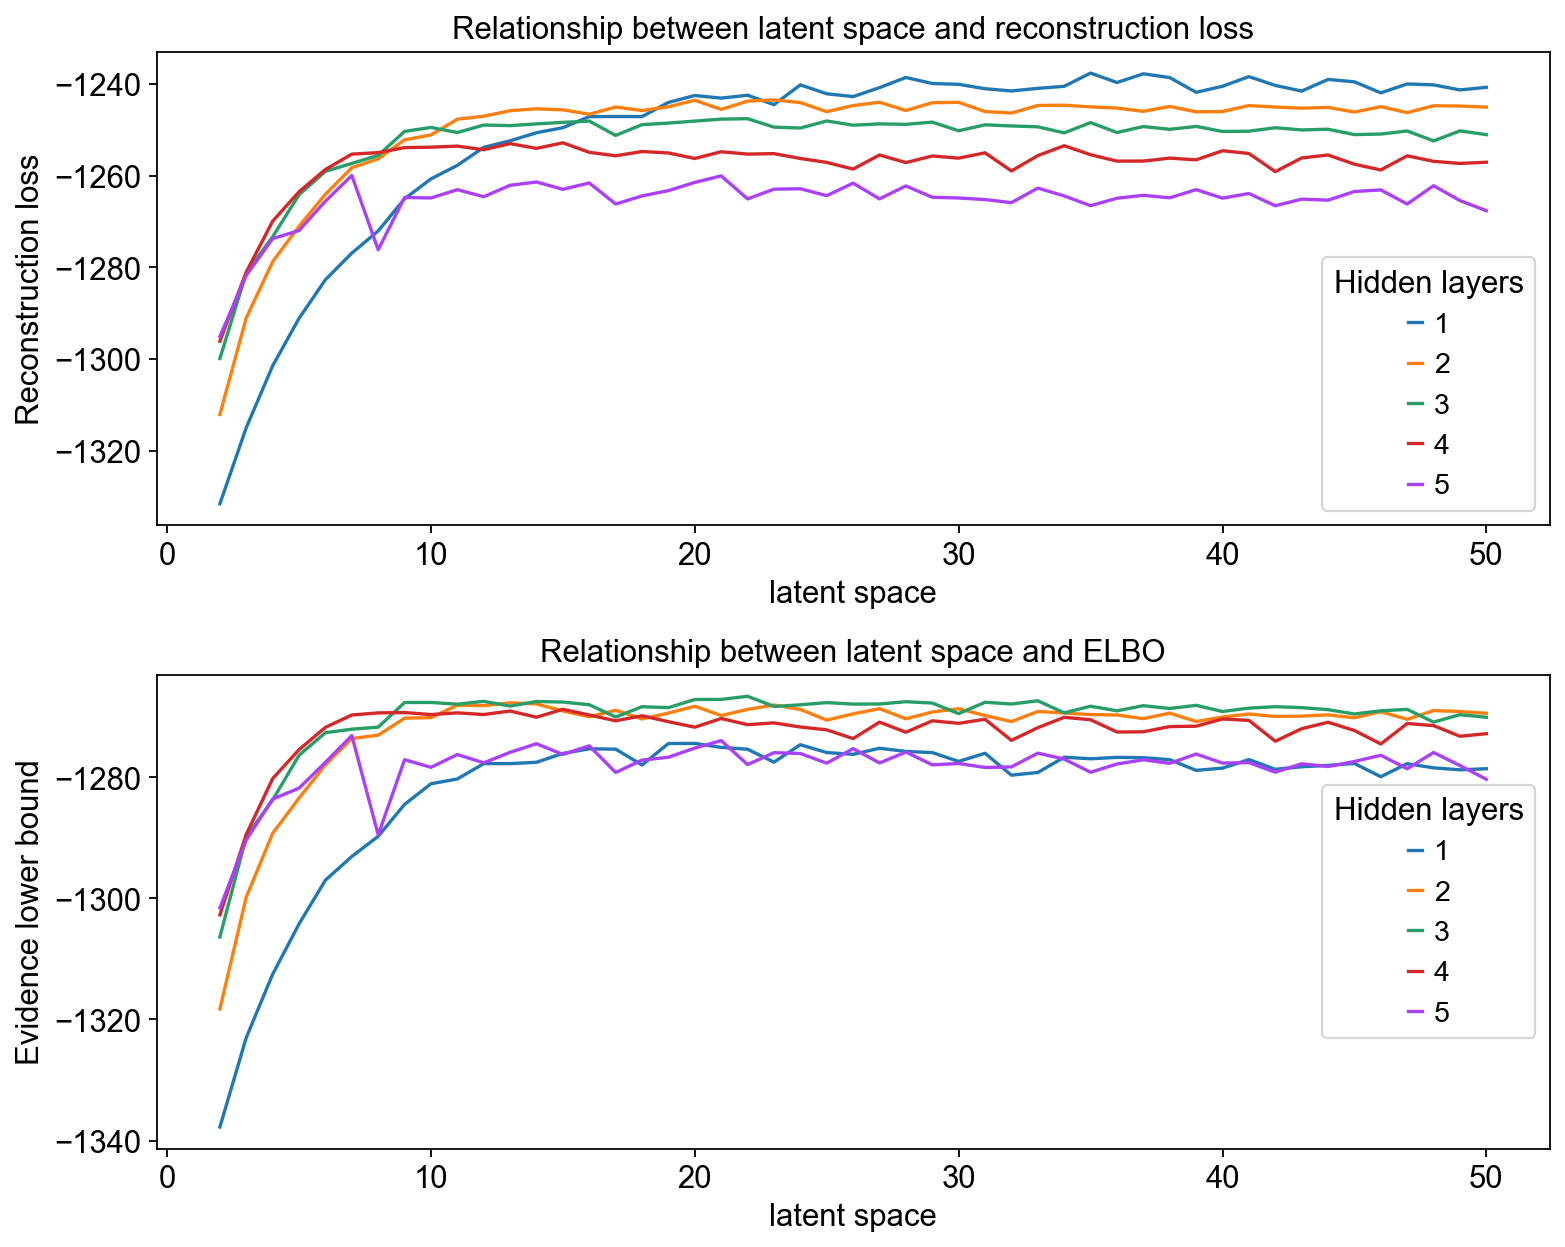

In [36]:
grouped_data = hp_data.groupby('n_layers')

fig, axs = plt.subplots(2, figsize=(10, 8))

for name, group in grouped_data:
    axs[0].plot(group['n_latent'], group['Reconstruction loss'], label=f'{name}')

axs[0].set_title('Relationship between latent space and reconstruction loss')
axs[0].set_xlabel('latent space')
axs[0].set_ylabel('Reconstruction loss')
axs[0].legend(title='Hidden layers', loc='best')


for name, group in grouped_data:
    axs[1].plot(group['n_latent'], pd.to_numeric(group['Evidence lower bound']), label=f'{name}')

axs[1].set_title('Relationship between latent space and ELBO')
axs[1].set_xlabel('latent space')
axs[1].set_ylabel('Evidence lower bound')
axs[1].legend(title='Hidden layers', loc='right')

plt.tight_layout()
plt.show()

<em><b>Figure 11:</b> In the upper graph, the relationship between the latent space and the reconstruction loss was displayed. Every latent variable (1 to 50) was plotted against the reconstruction loss. The upper graph showed a noticeable increase in the reconstruction loss score after approximately 10 latent variables, with the trend for each hidden layer flattening out beyond this point. This graph indicated that an increase in hidden layers corresponds to less reconstruction loss. The lower graph illustrated the relationship between the latent space and the ELBO. Similar to the upper graph, each latent variable (1 to 50) was plotted against the ELBO. An evident increase was observed after approximately 10 latent variables, with the trend for each hidden layer evening out beyond this threshold. Notably, the ELBO values in between each hidden layer have a marginal difference.</em>

Model with the following params: n_hidden: 128 n_latent:2 n_layers:1


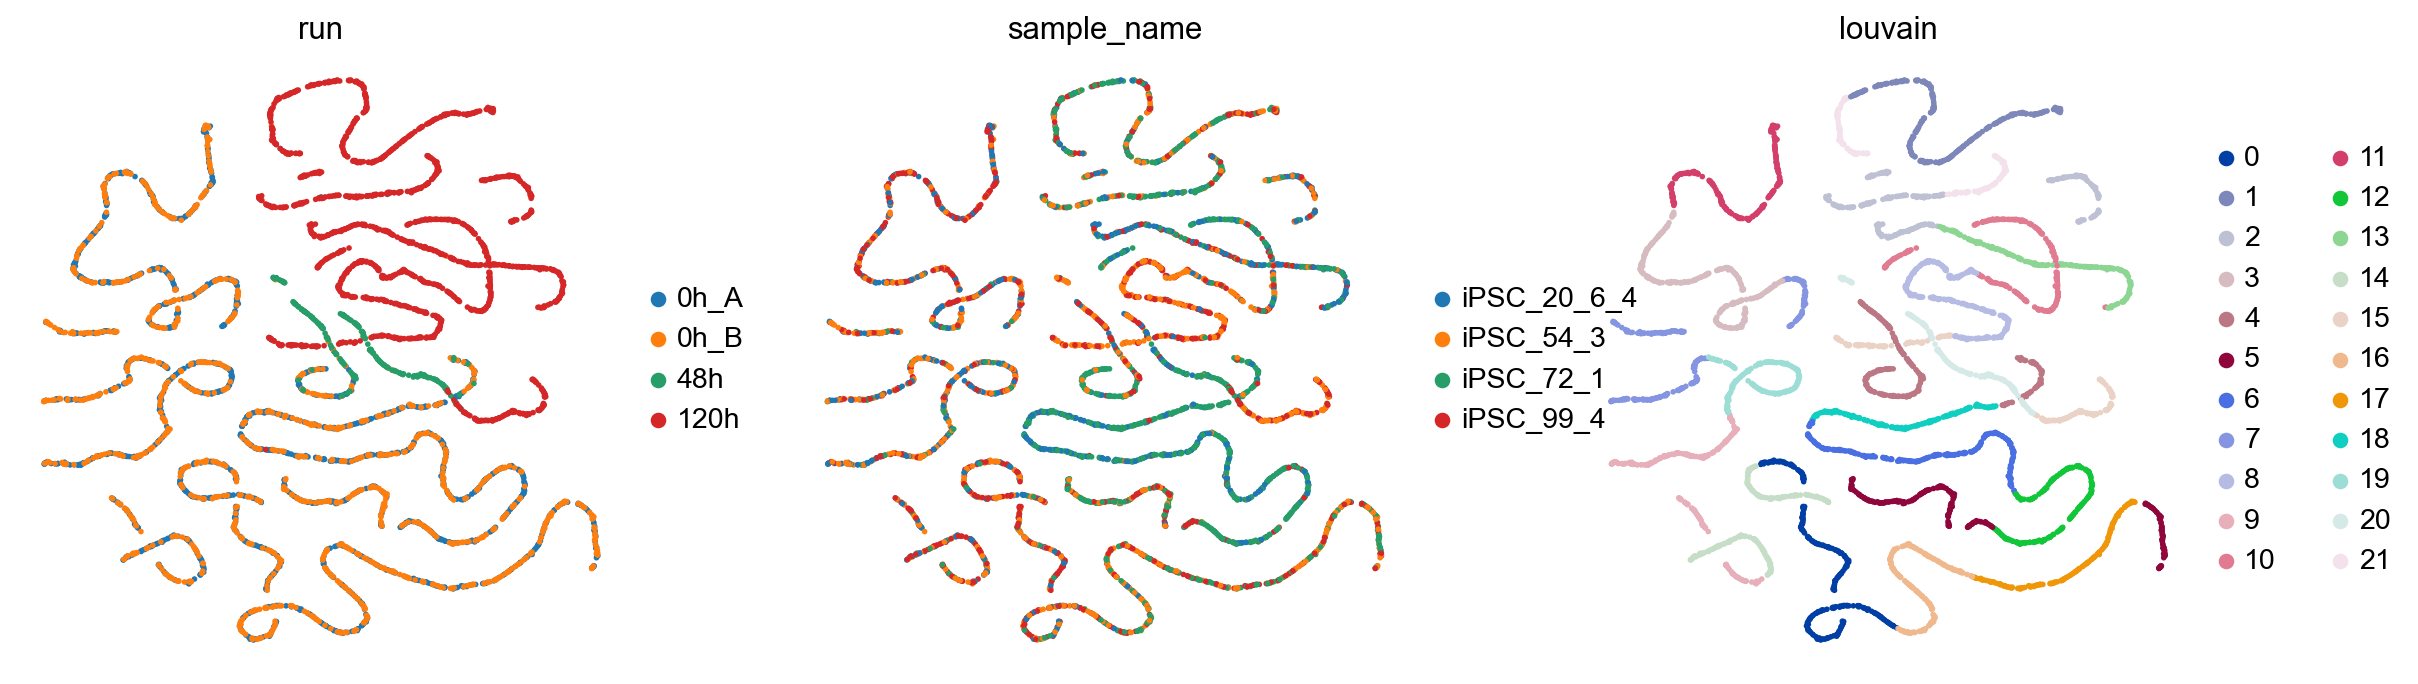

Model with the following params: n_hidden: 128 n_latent:10 n_layers:1


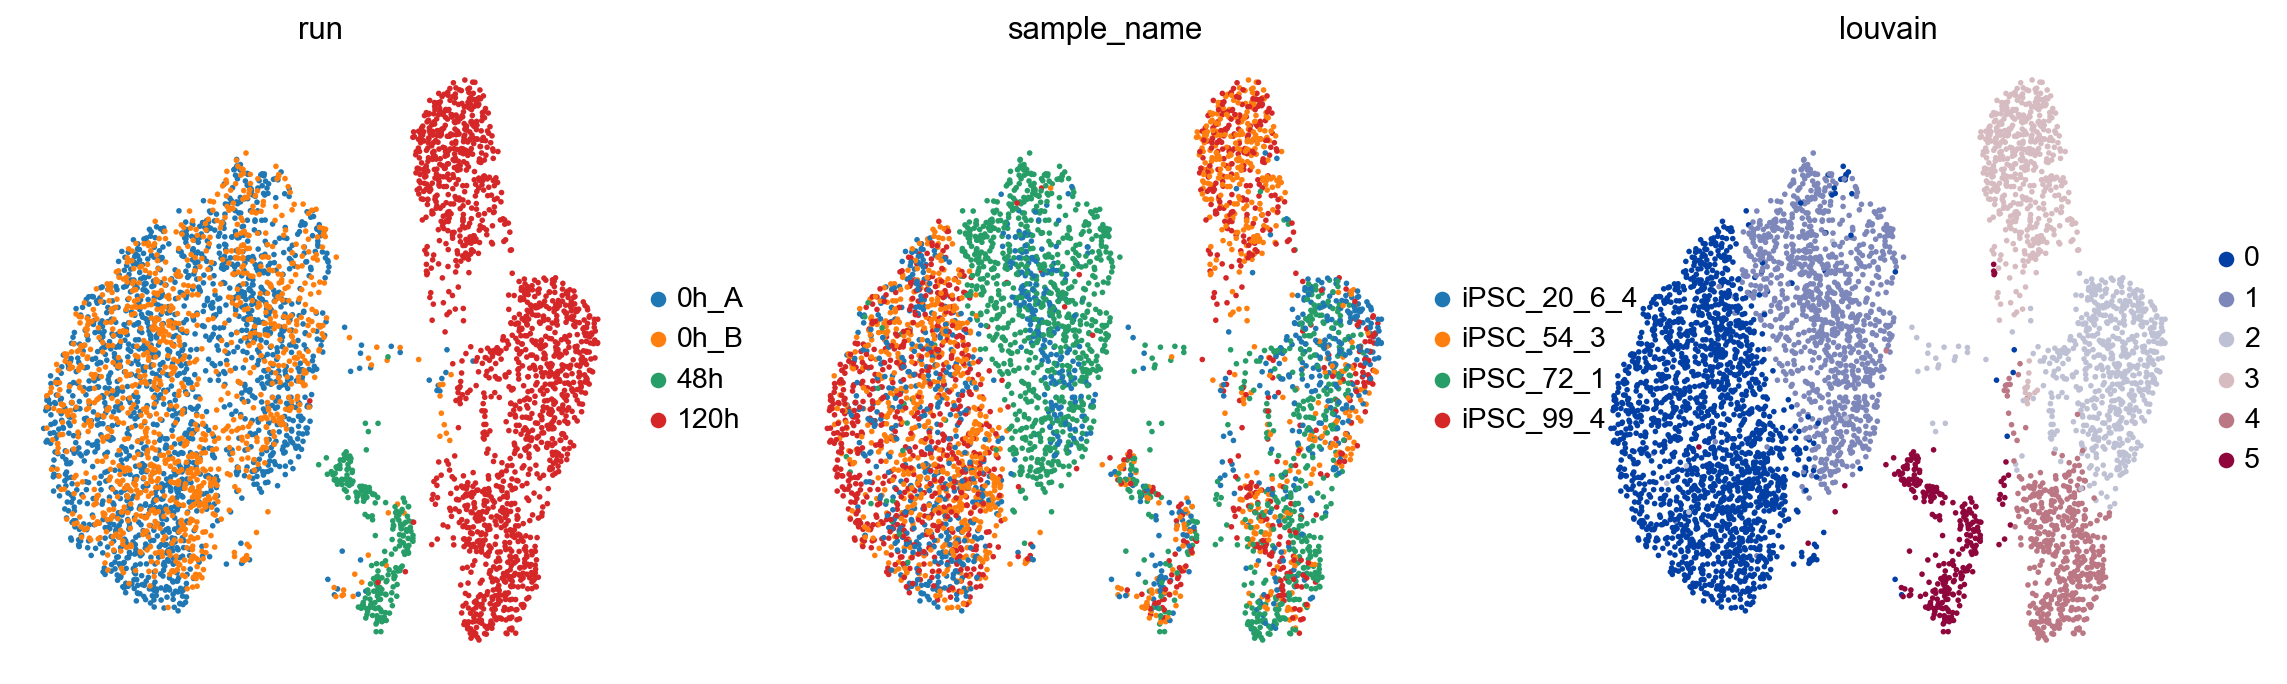

Model with the following params: n_hidden: 128 n_latent:20 n_layers:1


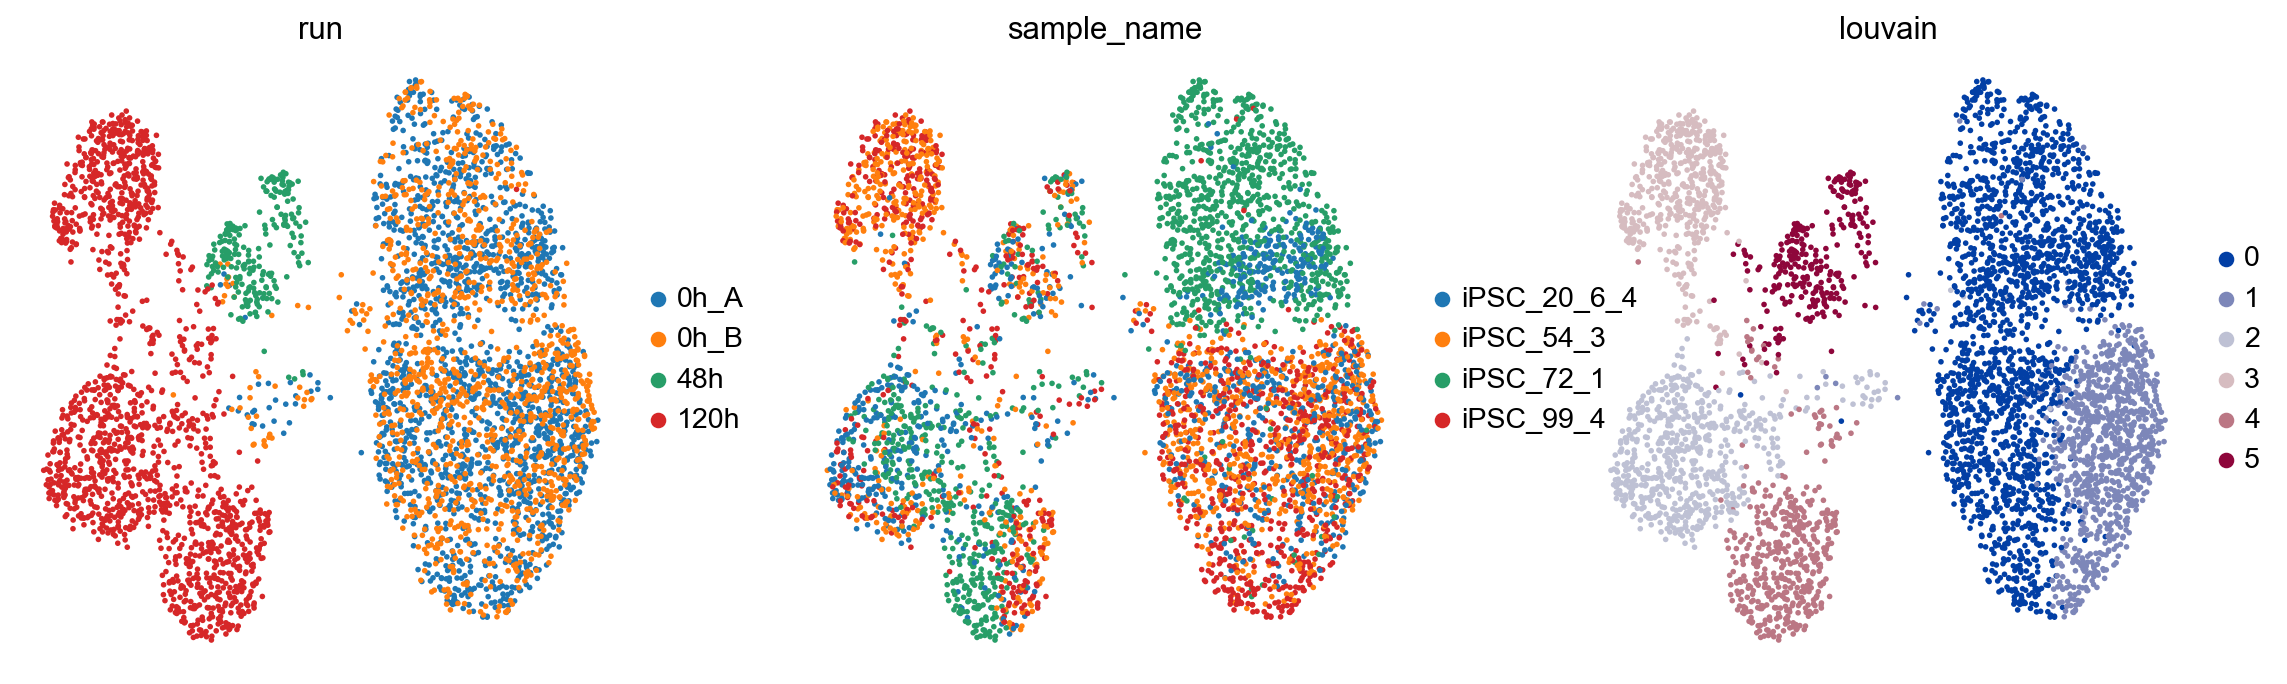

In [42]:
model_dir = os.path.join(save_dir, "hp_model/")
models = ["1_128_2", "1_128_10","1_128_20"]
adata2 = adata

for model in models:
    if model == ".DS_Store":
        continue 
    file_path = os.path.join(model_dir, model)
    
    parameters = model.split("_")
    print(f"Model with the following params: n_hidden: {parameters[1]} n_latent:{parameters[2]} n_layers:{parameters[0]}")

    t_model = scvi.model.SCVI.load(file_path, adata=adata2)
    adata2.obsm["X_scvi"] = t_model.get_latent_representation()
    sc.pp.neighbors(adata2, use_rep="X_scvi", metric="cosine", n_neighbors=30, random_state=seed)
    sc.tl.umap(adata2, random_state=seed)
    sc.tl.louvain(adata2, key_added="louvain", resolution=0.45, random_state=seed)
    sc.pl.umap(adata2, color=["run", "sample_name", "louvain"], frameon=False)

<em><b>Figure 12:</b> The columns in the graphs represented runs, sample names, and Louvain UMAPs, while the rows corresponded to extreme latent variable values within the hyperparameter set. Specifically, the first row showcased UMAPs with a latent variable value of two, the middle row with a latent variable of ten, and the bottom row with a latent variable of 20. The hidden layers and nodes were set to default values.
In the first row, the UMAPs exhibited suboptimal clustering, forming lines rather than clearly defined clusters. The second and third rows presented more expected results, featuring UMAPs with well-defined clusters. However, those runs showed cells from the 48h run intertwined with the 0h_A and 0h_B clusters, deviating from the anticipated outcome. This observation indicated a less distinct separation between differentiation times than expected. Furthermore, in the Louvain column, six clusters were expected, but the results showed five clusters. This discrepancy suggested an inconsistency between the expected and observed clustering outcomes in the Louvain analysis, that was congruent with the extreme values chosen.</em>

## Training model

The setup, including the data, the desired layer, and a batch key for batch correction, was used to train the model. The script checked for the availability of CUDA for an Nvidia GPU; if available, it would use the GPU, or else it would use the CPU to train the model. Finally, the model was saved after completion of the training process. 

Multiple computers with varied hardware specifications were employed to train the model, with no modifications to the dataset or default training settings. The training duration for the model, using a subset of 2,000 highly variable genes, was recorded. Equipped with an Nvidia RTX 3060Ti GPU, the first computer completed the training process in 2 minutes and 56 seconds. The second computer, which featured an M2 silicon chip from Apple and operated using the Metal Performance Shaders (MPS) framework, finished in 4 minutes and 23 seconds. Since both the third and last computers lacked a modern Nvidia GPU, they were unable to utilise the GPU. The third computer, with a Ryzen 5 3600 CPU, completed the training in 8 minutes and 24 seconds. The model training on the fourth computer, which utilised an AMD Ryzen 7 5800H CPU, took 8 minutes and 51 seconds. 

In [49]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="sample_name")
model = scvi.model.SCVI(adata)

In [50]:
model.train(train_size=training_size, use_gpu=use_gpu)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [03:25<00:00,  1.93it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [03:25<00:00,  1.94it/s, v_num=1, train_loss_step


In [51]:
model_dir = os.path.join(save_dir, "model")
model.save(model_dir, overwrite=True)

## Load model
The trained model got loaded into the workflow. The displayed information showed the configuration of the loaded model, including parameters such as the number of hidden layers `n_hidden`, latent space dimensionality `n_latent`, number of layers `n_layers`, dropout rate `dropout_rate`, dispersion parameterisation `dispersion`, gene likelihood model `gene_likelihood`, and latent distribution `latent_distribution`. The training status indicated that the model had been trained, and the model's AnnData is not minified, providing insights into the state of the loaded scVI model.

In [55]:
t_model = scvi.model.SCVI.load("model/", adata=adata)

In [56]:
t_model

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Trained
Model's adata is minified?: False

In [57]:
reconstruction_loss = model.get_reconstruction_error()
print(f"Reconstruction loss of this model: {reconstruction_loss['reconstruction_loss']}")

Reconstruction loss of this model: -1261.8911942106945


## Model quality 
The model needed some quality control to be validated. In this case, the ELBO, the reconstruction loss and the KL divergence were used for this goal. These measures of quality control were shown in **Figure 13**.

The `kl_weight` parameter represented the importance or coefficient given to the KL divergence term in the model. In Variational Autoencoders, KL divergence quantified the difference between the learned latent distribution and a standard normal distribution (mean = 0, standard deviation = 1). It was crucial for balancing the latent space regularization against the reconstruction accuracy. It was expected to show a linear growth graph. The ELBO in `elbo_train` stands for Evidence Lower Bound; it was a fundamental concept in variational inference, acting as a lower bound on the log-likelihood of the observed data. It optimised the model during training, ensuring that the model maximised the likelihood of the data while maintaining a regularised latent space. The `reconstruction_loss_train` represented the reconstruction loss, which measured how well the model could reconstruct the input data. It was essential in autoencoders and played a critical role in evaluating how well the model's output matches the original input. Minimising this loss led to higher fidelity in the reconstructed data. The `kl_local_train` was a more granular aspect of KL divergence, providing a detailed view of the divergence for individual components or aspects of the model. It helped understand and diagnose the model's performance in more detail. 





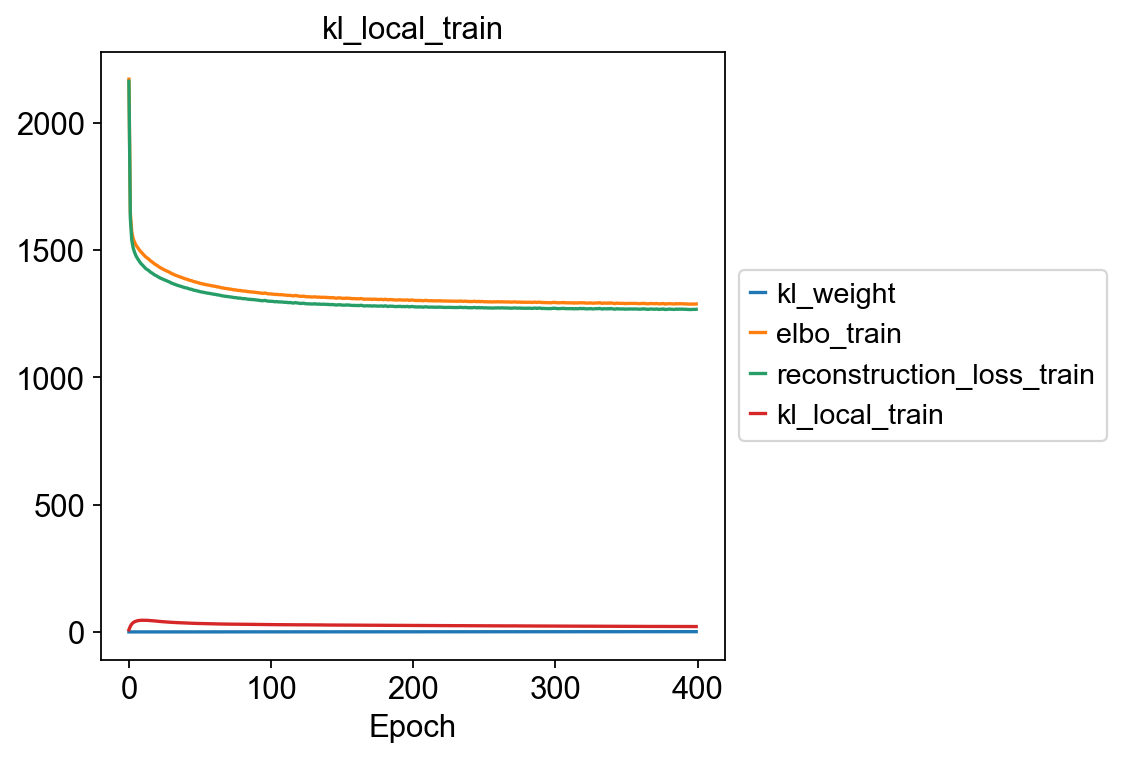

In [58]:
keys = ['kl_weight', 'elbo_train', 'reconstruction_loss_train', 'kl_local_train']

for key in keys:
    plt.plot(t_model.history[key], label=key)
    plt.xlabel('Epoch')
    plt.title(key)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<em><b>Figure 13:</b> A graph showing data integrity correlating to each epoch. Decreasing trend in the reconstruction_loss meant that the difference between the reconstructed output and original input was shrinking.</em>

# Results

## Latent UMAP

The primary preferred outcome from the trained model was the latent representation corresponding to each cell. This entailed a multidimensional embedding that mitigated batch effects and could be utilised akin to the application of PCA dimensions in the analysis of an individual dataset. We stored this representation within the `obsm` attribute under the key `X_scvi`.

In [61]:
adata.obsm["X_scvi"] = t_model.get_latent_representation()
adata.layers['scvi_normalized'] = t_model.get_normalized_expression(libray_size = 1e5)

The neighbors function was used to identify neighboring cells within a specific data representation `X_scvi` using cosine distance metric. This step likely aimed to uncover cellular similarities based on gene expression patterns, considering cells with similar expression profiles as `neighbors`. Next, the method `sc.tl.umap()` was utilised to conduct Uniform Manifold Approximation and Projection `UMAP`, a dimensionality reduction method commonly employed for visualising high-dimensional scRNA-seq data in a lower-dimensional space. This process aided in visualising cell clustering or grouping in a more interpretable two-dimensional space. Finally, identifies clusters with the Louvain algorithm on the `adata` object. This algorithm was a widely used community detection method that identifies clusters or communities of cells based on connectivity patterns within the data network. The UMAPs were shown in **Figure 14** where highlighted is on `run` and `sample_name`.

In [62]:
sc.pp.neighbors(adata, use_rep="X_scvi", metric="cosine", n_neighbors=30, random_state=seed)
sc.tl.umap(adata, random_state=seed)

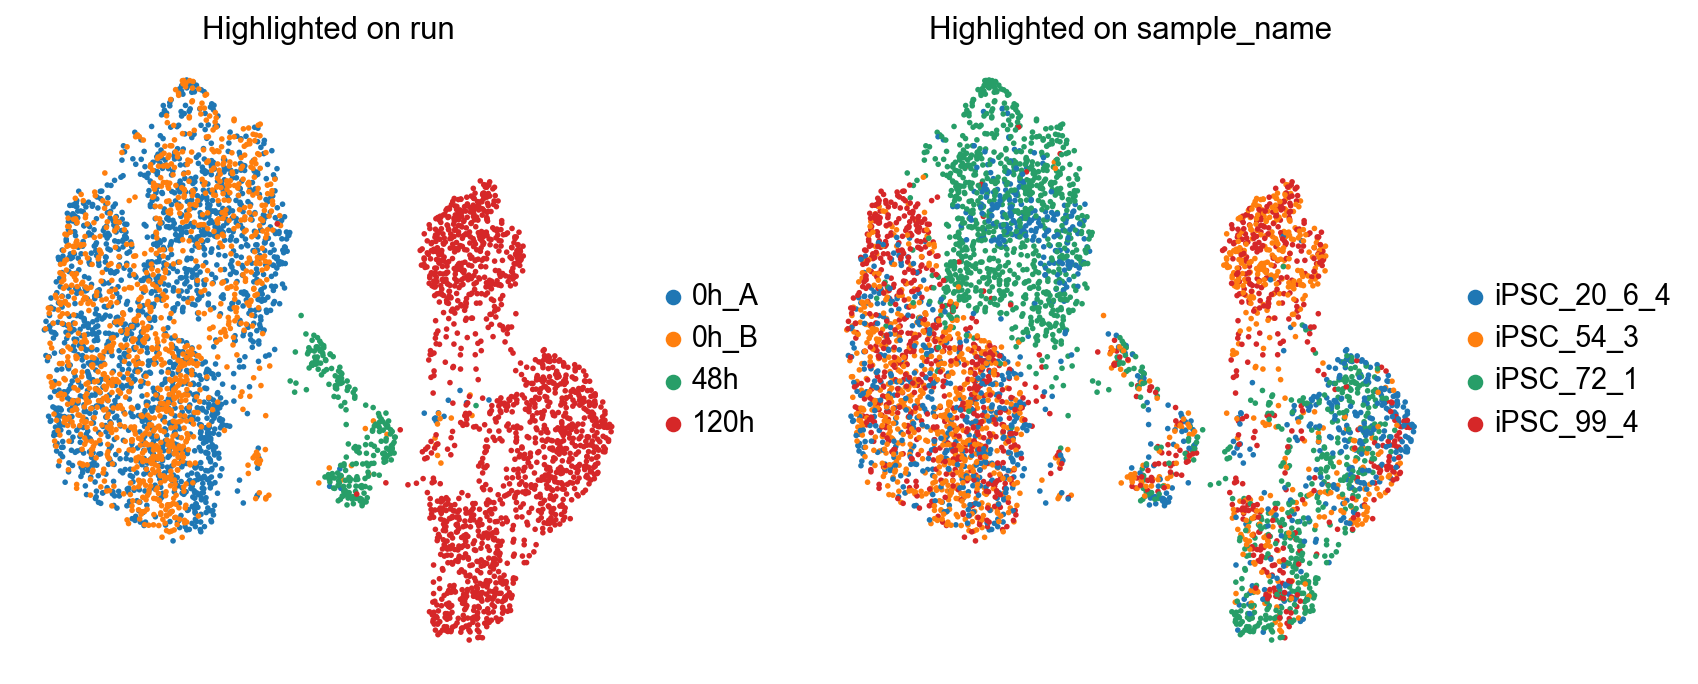

In [63]:
sc.pl.umap(
    adata,
    title=["Highlighted on run", "Highlighted on sample_name"],
    color=["run", "sample_name"], 
    frameon=False
)

<em><b>Figure 14:</b> The neighbors function was used to identify cells within a latent representation from the trained model of scVI. Two UMAPs were reconstructed from this latent representation. The first UMAP, titled "Clustering on run", was based on the 'run', representing different differentiation times. In this UMAP, 0h_A and 0h_B were clustered together into one large cluster, 48H formed a small separate cluster, and 120H appeared as a large, dispersed cluster. The second UMAP, "Clustering on sample_name", was based on 'sample_name', indicating the cells' origins. Different groups were then clustered together, resulting in a more homogeneous outcome.</em>

## Louvain UMAP

Louvain was a community detection algorithm commonly used in network analysis to detect molecular structures within complex systems. It was known for its efficiency and scalability, making it suitable for large-scale networks. Louvain was used as the clustering method to identify the different clusters of each cell type. The parameter `resolution=0.45` adjusted the granularity of the clusters, where lower values resulted in finer clusters and higher values create coarser clusters. The results of the Louvain method were shown in **Figure 15**, where each cluster was highlighted in a different colour.

In [64]:
sc.tl.louvain(adata, key_added="louvain", resolution=0.45, random_state=seed)

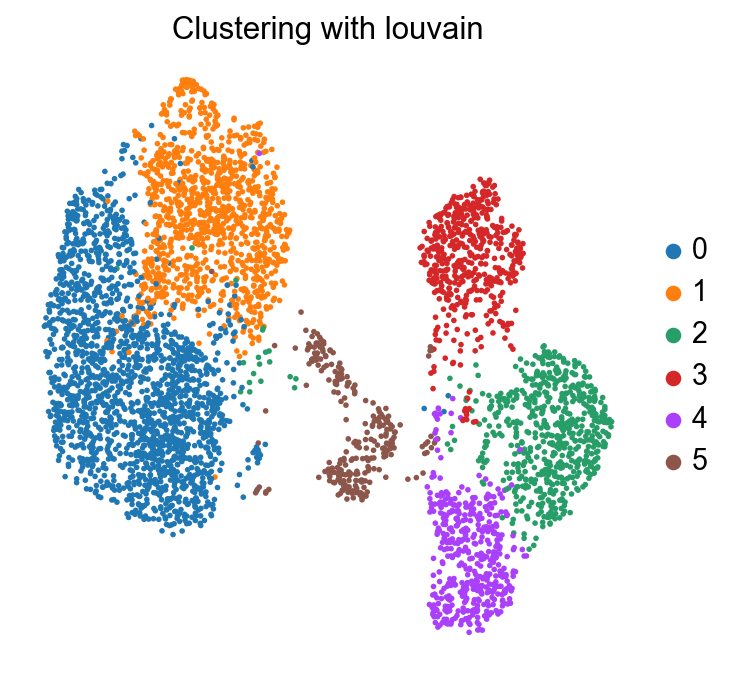

In [65]:
sc.pl.umap(
    adata,
    color="louvain",
    frameon=False,
    title="Clustering with louvain"
)

<em><b>Figure 15:</b> The neighbors function was used to identify cells within a latent representation from the trained model of scVI. The Louvain algorithm was used as the clustering method to identify the different clusters of each cell type. the UMAP showed 6 different clusters based on the Louvain algorithm.</em>

## Find marker genes Scanpy

The file retrieved from Seurat containing marker genes was used to compare the genes of Seurat and scVI. scVI used a method based on Louvain and Wilcoxon to rank the genes. It used 30 markers for each Louvain cluster and filters on a p_adjusted-value of 0.05 were shown in **Table 6**.

In [66]:
sc.tl.rank_genes_groups(adata, groupby="louvain", key_added="markers", method='wilcoxon')

In [67]:
markers_df = pd.concat([
    sc.get.rank_genes_groups_df(adata, group=group, key='markers').assign(louvain_group=group)
    for group in adata.obs['louvain'].cat.categories
])
markers_df.to_csv(r'markers/scvi/markers_results.txt', index=None, sep='\t', mode='w') 

number_of_markers = 30
markers_df = markers_df[markers_df.pvals_adj < 0.05]
markers_results_top = markers_df.groupby("louvain_group").head(number_of_markers)

<em><b>Table 6:</b> Top 30 marker genes per cluster determined using the Louvain algorithm, filtered for significance (pvals_adj \< 0.05). The DataFrame included gene names, scores, logfold changes, p-values, adjusted p-values, and corresponding Louvain group.</em>

In [68]:
markers_results_top

names     scores  logfoldchanges         pvals     pvals_adj  \
0       SFRP1  54.145210        5.044744  0.000000e+00  0.000000e+00   
1       USP44  50.620171        4.018878  0.000000e+00  0.000000e+00   
2   MIR302CHG  45.723335        3.477731  0.000000e+00  0.000000e+00   
3       DANCR  43.531521        1.692812  0.000000e+00  0.000000e+00   
4       PSAT1  43.517628        2.407032  0.000000e+00  0.000000e+00   
..        ...        ...             ...           ...           ...   
25      RPL12  18.007620        0.531954  1.697733e-72  8.157085e-70   
26     ATP5MF  17.876791        1.069714  1.788394e-71  7.944180e-69   
27     TUBB2A  17.797260        1.717889  7.421169e-71  3.176665e-68   
28     RPL35A  17.750584        0.648952  1.705696e-70  7.045125e-68   
29      RPL24  17.498266        0.511419  1.476972e-68  5.608444e-66   

   louvain_group  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
25             5  
26             5  
27             5  
28             5  
29             5  

[180 rows x 6 columns]

## Confusion matrix

The confusion matrix, shown in **Figure 16**, was made to systematically compare the cell clusters identified by Seurat and scVI in the scRNA-seq dataset. This matrix comprehensively summarised the agreement and discrepancies between the two clustering algorithms. In this case, Seurat clusters were compared to the scVI clusters, where each cell in the confusion matrix represents the number of cells found in each cluster. That way a cell can be in cluster 1 of Seurat and cluster 2 in scVI, and then be placed based on its ID in the correct cell of the confusion matrix.

In [69]:
seurat = anndata.read_h5ad("h5ad/seurat/hiPSC_complete_mnn.h5ad")

In [70]:
adata.obs['seurat'] = seurat.obs["RNA_snn_res.0.22"].astype(dtype=str)

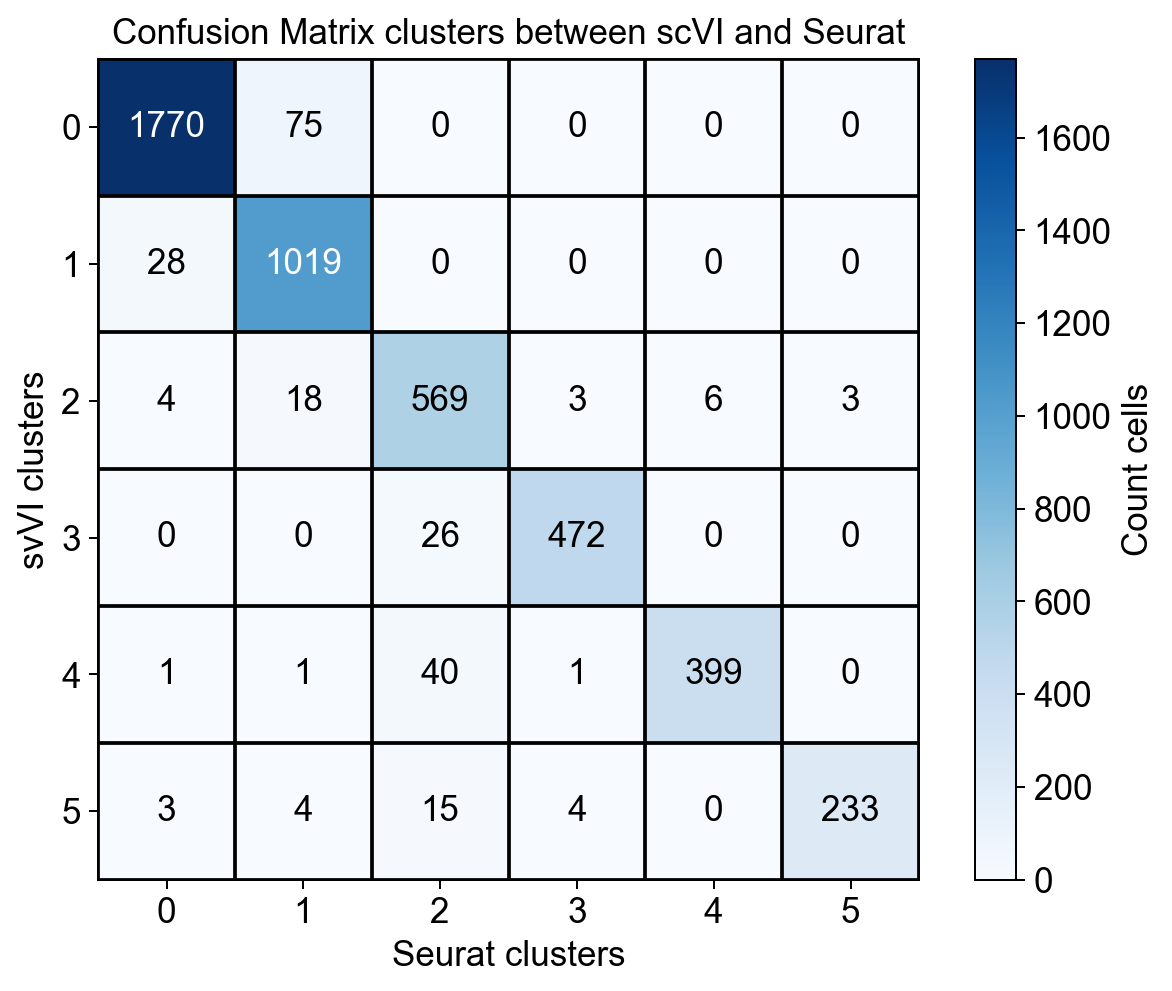

In [71]:
louvain_cm = adata.obs['louvain']
seurat_cm = adata.obs['seurat']
cm_data = confusion_matrix(louvain_cm, seurat_cm)

plt.figure(figsize=(8, 6), dpi=90)
plt.imshow(cm_data, cmap='Blues', interpolation='nearest')  

plt.hlines(np.arange(cm_data.shape[0] + 1) - 0.5, -0.5, cm_data.shape[1] - 0.5, color='black')
plt.vlines(np.arange(cm_data.shape[1] + 1) - 0.5, -0.5, cm_data.shape[0] - 0.5, color='black')

for i in range(len(cm_data)):
    for j in range(len(cm_data[i])):
        color = 'white' if cm_data[i, j] > np.max(cm_data) / 2 else 'black'
        plt.text(j, i, format(cm_data[i, j], ".0f"),
                 ha="center", va="center", color=color)

colorbar = plt.colorbar() 
colorbar.set_label('Count cells') 
plt.xlabel('Seurat clusters')
plt.ylabel('svVI clusters')
plt.title('Confusion Matrix clusters between scVI and Seurat')
plt.rcParams["axes.grid"] = False
plt.show()

<em><b>Figure 16:</b> Confusion Matrix between the clusters of Seurat and scVI. The Seurat cluster numbers were along the x-axis, and the scVI cluster numbers were along the y-axis. A linear trend could be found where cluster n from Seurat had the highest overlapping number of cells with cluster n from scVI. This could indicate that both scVI and Seurat made similar clusters overall. A significant cluster in the confusion matrix was cluster 2 from Seurat. The confusion matrix showed a medium number of cells from this cluster, which could be located in clusters 3,4 and 5 from scVI. This observation betokened a misclassification from scVI.</em>

## Cohen kappa score

Cohen's Kappa was a statistical measure that calculates the inter-rater agreement between two workflows. The Kappa score was derived from the confusion matrix (**see Figure 16**) and typically ranges between 0 and 1. A Kappa score of 1 represented a perfect agreement, while a score of 0 indicated an agreement worse than random.

In [72]:
print(f"Cohen's Kappa score: {round(cohen_kappa_score(louvain_cm, seurat_cm),3)}")

Cohen's Kappa score: 0.935


## Pathway analysis

For pathway analysis, the library 'gprofiler-official' was used. The analysis involved several key settings, including the `query`, which represented the list of genes to be analyzed. The `organism` setting specified the organism on which the analysis is performed, in this case, \"hsapiens.\" Additionally, the `ordered` setting was utilised to indicate that the results should be sorted; in this case, it's set to True. A `user_threshold` of ≤ 0.05 was applied to determine which results are accepted. The `domain_scope` restricted the search to annotated genes. Finally, the `sources` refered to the sources for functional annotation, encompassing Gene Ontology-molecular function, cellular component, biological process, and KEGG pathways."

In [73]:
gp = GProfiler(return_dataframe=True)
number_of_markers_pathways = 30
markers_results_top_pathways = markers_df.groupby("louvain_group").head(number_of_markers_pathways)

pathways_data = pd.DataFrame()

for louvain_group, group_data in markers_results_top_pathways.groupby("louvain_group"):
    genes = list(group_data['names'])
    pathways = gp.profile(query=genes,
                          organism="hsapiens",
                          ordered=True,
                          user_threshold=0.05,
                          domain_scope="annotated",
                          sources=["GO:MF", "GO:CC", "GO:BP", "KEGG"] 
                         )
    pathways['louvain_group'] = louvain_group
    pathways_data = pd.concat([pathways_data, pathways])
pathways_data.to_csv(f"pathway_analysis/pathway_analysis.txt", index=None, sep='\t', mode='w')

The results of the pathway analysis were shown in **Table 7** with multiple headers; source indicated the source of the pathway analysis (e.g., KEGG, GO:MF, GO:CC, GO:BP). `native` represented the native identifier for the pathway or term. `name` indicated a descriptive name or description of the pathway or term. `p_value`  obtained from the analysis, often used to assess the significance of a pathway or term. `significant` indicates whether the pathway or term was considered statistically significant based on the analysis (True/False). `description` showed further explanation or definition of the pathway or term. `term_size` contained the term in consideration (e.g., number of genes involved). `query_size` indicated the query gene list used for the analysis. `intersection_size` indicated the number of genes that intersect between the query and the term/pathway. `effective_domain_size` indicated the size of the effective domain for this analysis. `precision` indicated the precision metric for the analysis. `recall` recall metric for the analysis. `query` showed the specific identifier or information related to the query used. `parents` indicated the parent terms or identifiers related to the pathway or term. `louvain_group` indicated the Louvain group to which this pathway or term belongs.

<em><b>Tabel 7:</b> Table containing the pathway analysis with the top 30 of each Louvain group. The pathways DataFrame consisted of the source, native name, p_value, significant, description, term_size, query_size, intersection_size, effective_domain_size, precision, recall, query, parents and louvain_group.</em>

In [74]:
pathways_data.groupby("louvain_group").head(1)

source      native                                               name  \
0   KEGG  KEGG:00270                 Cysteine and methionine metabolism   
0  GO:BP  GO:0051402                           neuron apoptotic process   
0  GO:BP  GO:0048646  anatomical structure formation involved in mor...   
0  GO:BP  GO:0001714                 endodermal cell fate specification   
0  GO:BP  GO:0060485                             mesenchyme development   
0  GO:CC  GO:0022626                                 cytosolic ribosome   

        p_value  significant  \
0  1.352458e-03         True   
0  8.483376e-05         True   
0  8.045093e-08         True   
0  1.178456e-04         True   
0  8.664834e-09         True   
0  7.017540e-23         True   

                                         description  term_size  query_size  \
0                 Cysteine and methionine metabolism         49          28   
0  "Any apoptotic process in a neuron, the basic ...        269          17   
0  "The developmental process pertaining to the i...       1172          10   
0  "The cell fate determination process that resu...          8          24   
0  "The process whose specific outcome is the pro...        312          28   
0  "A ribosome located in the cytosol." [GOC:mtg_...        110          30   

   intersection_size  effective_domain_size  precision    recall    query  \
0                  4                   8161   0.142857  0.081633  query_1   
0                  6                  21010   0.352941  0.022305  query_1   
0                  9                  21010   0.900000  0.007679  query_1   
0                  3                  21010   0.125000  0.375000  query_1   
0                 10                  21010   0.357143  0.032051  query_1   
0                 14                  22090   0.466667  0.127273  query_1   

                    parents louvain_group  
0              [KEGG:00000]             0  
0              [GO:0006915]             1  
0  [GO:0009653, GO:0032502]             2  
0  [GO:0001708, GO:0001711]             3  
0  [GO:0009888, GO:0048513]             4  
0  [GO:0005829, GO:0005840]             5

## Save AnnData object

In [75]:
anndata_dir = os.path.join(save_dir, "h5ad/scvi/anndata")
os.makedirs(os.path.dirname(anndata_dir), exist_ok=True)
adata.write_h5ad(anndata_dir)

# Discussion and conclusion


scVI and Seurat are both packages that serve as powerful tools for analysing single-cell RNA sequencing (scRNA-seq) data, yet they fundamentally differ in their methodologies. Initially, both workflows start with an object that is made up of 6775 by 23543 cells, alongside their respective features, signifying the genes. Following the filtration of biologically irrelevant data, namely a high mitochondrial DNA percentage and cells with a gene count below 2000 and above 7000, both workflows still retain the same object shape: 4694 x 23543. This suggests that the data continues to be identical. For both before and after, three violin plots are made to confirm the successful completion of the filtering step; these violin plots can be seen in **Figures 5 and 8**. In scVI, the normalisation step like its counterpart in the Seurat workflow is redundant, as the scVI deep learning model cannot train properly using normalised data; however, since other packages might require normalised data in the future, a separate normalised dataset remains in the workflow. After this, the 2000 most highly variable genes are selected from the dataset to continue; the difference in size per run can be seen in **Figure 9**. The total object shape changed to 4694x2000.


To optimise hyperparameters, a grid approach is employed to investigate different combinations of n_hidden, n_latent, and n_layers. While the default settings are 128 for n_hidden, 10 for n_latent, and 1 for n_layers, the grid method systematically explores variations within the following ranges: n_hidden values at 128, n_latent between from 2 to 50, and n_layers from 1 to 5. However, when looking at the reconstruction loss and the ELBO in **Tables 4 & 5**, there is no advantage in exploring these hyperparameters for this dataset, as this dataset is small, the default hyperparameters simulate the same results as when using other hyperparameters, this can also be seen in **Figure 13** where there are multiple UMAPs with different parameters to show that it does not affect the result significantly. Furthermore, when looking at the number of epochs in **Figure 11**, for the first 200 epochs both the ELBO train and the reconstruction loss get closer to zero, after which it stagnates towards 400 epochs. Because of these results, the default settings are selected for training. The graph in **Figure 13** validates the post-training model quality with default settings by confirming expected values for the ELBO train and reconstruction loss. In **Figure 14** two UMAPs are illustrated, one for the runs and one for the sample names. In the first one, the runs 0h_a and 0h_b are intertwined and separate from the other differentiation times. This shows a clear divide in expression between these different times. The longer the differentiation times are, the further to the right of the graph the cells are. The second UMAP shows the different samples being intertwined within each other with no clear pattern.


There are six clusters formed when using a resolution of 0.365 and the clustering method Louvain. This results in the same amount of clusters as the Seurat workflow, this was done to see more clear differences between the methods. Clusters 0 and 1 are close next to each other indicating that these cells have similar gene expression, which shows that these cells are of a related type. Cluster 5 seems to be consisting of cells with a differentiation time of 48 hours. The other clusters are built up from the cells with a differentiation time of 120 hours. To examine the differences and similarities in the clustering, the confusion matrix in **Figure 16** shows that most of the cells are clustered in the same cluster as the one in the Seurat workflow. However, some outlying cells are in cluster 0 for scVI that are in cluster 1 for Seurat. Furthermore, cluster 2 from Seurat contains multiple cells from clusters 3, 4 and 5 from scVI. These differences can be attributed to cases like the AELC cluster in Seurat. The cells comprising this cluster in Seurat form a completely different cluster in scVI, namely the PGCLC cluster, as seen in cluster 3 of **Figure 15**. In this AELC cluster, a group of cells expressing signature genes for endoderm could be identified. These cells carry over to the PGLC cluster but are separated from the whole and can be found clustered together at the bottom of said cluster. These differences render the scVI UMAP more representative and informative than its Seurat counterpart, as quantified by a Cohen’s Kappa score of 0.935.




Moreover, a list of the top 30 marker genes per cluster is generated and can be observed in **Table 7**. However, delving into detailed research on these marker genes exceeds this project’s scope and may prove valuable for future studies, but a clear divide can be observed between the marker genes found by Seurat and those found by scVI. Additionally, pathway analysis is conducted for molecular function, cellular components, biological processes, and KEGG. The outcomes of these pathway analyses are stored in a text file. Nevertheless, conducting an extensive investigation of these pathways falls beyond the project's objectives and could serve as a foundation for future pathway analysis research. A future research project could involve the analysis of larger and more complex datasets to further investigate the differences in results between Seurat and scVI. This expanded study could explore the scalability of both tools and assess their performance in handling increased data volumes and biological diversity. Furthermore, multiple smaller datasets can be used to validate the reliability of this workflow.




In conclusion, the comparative analysis between Seurat and scVI in the context of single-cell RNA sequencing displayed subtle differences in their clustering results. Notably, scVI showcased a significantly more representative and informative UMAP compared to its Seurat counterpart. This indicates the strength of scVI in capturing the underlying biological structure and patterns and also shows its potential to provide more insight into cellular heterogeneity. This can be further observed in the diverging results of the marker genes.

# Bibliography

1. OUP accepted manuscript. Briefings In Bioinformatics. Published online 2021. doi:https://doi.org/10.1093/bib/bbab473
2. Liu J, Fan Z, Zhao W, Zhou X. Machine intelligence in single-cell data analysis: Advances and new challenges. Frontiers in Genetics. 2021;12. doi:https://doi.org/10.3389/fgene.2021.655536
3. Seurat. Satijalab.org. Published 2019. https://satijalab.org/seurat/
4. Keras autoencoder vs PCA: A comparative analysis for data scientists | saturn cloud blog. saturncloud.io. Published July 2023. https://saturncloud.io/blog/keras-autoencoder-vs-pca-a-comparative-analysis-for-data-scientists/
5. Rocca J. Understanding variational autoencoders (VAEs). Medium. Published March 2020. https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73
6. GEO accession viewer. www.ncbi.nlm.nih.gov. https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE214521
7. Overeem AW, Chang YW, Moustakas I, et al. Efficient and scalable generation of primordial germ cells in 2D culture using basement membrane extract overlay. Cell Reports Methods. 2023;3:100488. doi:https://doi.org/10.1016/j.crmeth.2023.100488
8. Horer S, Feichtinger M, Rosner M, Hengstschläger M. Pluripotent stem cell-derived in vitro gametogenesis and synthetic Embryos—It is never too early for an ethical debate. Stem Cells Translational Medicine. 2023;12:569-575. doi:https://doi.org/10.1093/stcltm/szad042
9. Mourad AS, Alzahrani AJ, Mahmoud A. Induced pluripotent stem cells (iPSCs)—Roles in regenerative therapies, disease modelling and drug screening. Cells. 2021;10:2319. doi:https://doi.org/10.3390/cells10092319
10. Wesevich VG, Arkfeld C, Seifer DB. In vitro gametogenesis in oncofertility: A review of its potential use and present-day challenges in moving toward fertility preservation and restoration. Journal of Clinical Medicine. 2023;12:3305. doi:https://doi.org/10.3390/jcm12093305
11. Seurat - guided clustering tutorial. satijalab.org. https://satijalab.org/seurat/articles/pbmc3k_tutorial.html
12. scVI. Python. https://docs.scvi-tools.org/en/stable/user_guide/models/scvi.html
13. Lopez R, Regier J, Cole MB, Jordan MI, Yosef N. Deep generative modeling for single-cell transcriptomics. Nature Methods. 2018;15:1053-1058. doi:https://doi.org/10.1038/s41592-018-0229-2
14. Dertat A. Applied deep learning - part 3: Autoencoders. Medium. Published October 2017. https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
15. Birla D. Autoencoders. Medium. Published March 2019. https://medium.com/@birla.deepak26/autoencoders-76bb49ae6a8f
16. An introduction to autoencoders: Everything you need to know. www.v7labs.com. https://www.v7labs.com/blog/autoencoders-guide
17. Irhum Shafkat. Intuitively understanding variational autoencoders. Medium. Published February 2018. https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf
18. Understanding UMAP. pair-code.github.io. https://pair-code.github.io/understanding-umap/
19. McInnes L, Healy J, Saul N, Großberger L. UMAP: Uniform manifold approximation and projection. Journal of Open Source Software. 2018;3:861. doi:https://doi.org/10.21105/joss.00861
20. SHARMA S. Epoch vs Batch Size vs Iterations. Towards Data Science. Published September 23, 2017. https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
21. A few tips on training models - scArches documentation. docs.scarches.org. Accessed December 11, 2023. https://docs.scarches.org/en/latest/training_tips.html